In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import warnings
import seaborn as sns
import ehrapy as ep
import anndata as ad

plt.style.use("ggplot")
warnings.filterwarnings("ignore")
from tableone import TableOne

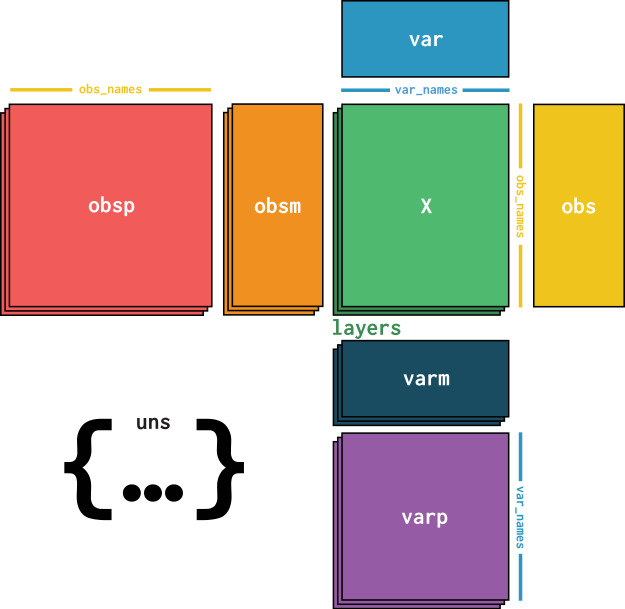

In [71]:
adata = ep.dt.diabetes_130_raw(encoded=True)

Finished one-hot of autodetected columns. 10…00%


array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  9.],
       [ 0.,  1.,  0., ...,  0.,  1.,  6.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 13.],
       [ 0.,  0.,  0., ...,  0.,  1.,  9.],
       [ 0.,  0.,  0., ...,  0.,  0.,  9.]], dtype=float32)

In [75]:
data = adata.to_df()

In [98]:
adata = ep.io.read_csv("./notebooks/ehrapy_data/icu_stay_labsdiag.csv.gz", 
            index_column='stay_id',
            columns_obs_only=['subject_id', 'intime', 'outtime', 'hadm_id', 'has_J18', 'dod', 'gender', 'ethnicity', 'insurance']) 

#adata2 = ep.io.read_csv("./notebooks/ehrapy_data/icu_stay_diag.csv.gz") 

In [99]:
adata

AnnData object with n_obs × n_vars = 9864 × 110
    obs: 'subject_id', 'intime', 'outtime', 'hadm_id', 'has_J18', 'dod', 'gender', 'ethnicity', 'insurance'
    layers: 'original'

In [100]:
adata.var
# we have 9864 unique icu_stays and 165 features

Empty DataFrame
Columns: []
Index: [Age, hospital_death, los, has_E87, has_I50, has_N17, has_J96, has_E11, has_I25, has_E78, has_J98, has_Z51, has_I47, has_I10, has_D64, has_Z95, has_N18, ALT_max, ALT_mean, ALT_min, AST_max, AST_mean, AST_min, Admission Weight (Kg)_max, Admission Weight (Kg)_mean, Admission Weight (Kg)_min, Alkaline Phosphate_max, Alkaline Phosphate_mean, Alkaline Phosphate_min, Anion gap_max, Anion gap_mean, Anion gap_min, BUN_max, BUN_mean, BUN_min, Calcium non-ionized_max, Calcium non-ionized_mean, Calcium non-ionized_min, Chloride (serum)_max, Chloride (serum)_mean, Chloride (serum)_min, Creatinine (serum)_max, Creatinine (serum)_mean, Creatinine (serum)_min, Glucose (serum)_max, Glucose (serum)_mean, Glucose (serum)_min, HCO3 (serum)_max, HCO3 (serum)_mean, HCO3 (serum)_min, Heart Rate_max, Heart Rate_mean, Heart Rate_min, Hematocrit (serum)_max, Hematocrit (serum)_mean, Hematocrit (serum)_min, Hemoglobin_max, Hemoglobin_mean, Hemoglobin_min, Lactic Acid_max, Lactic Acid_mean, Lactic Acid_min, Magnesium_max, Magnesium_mean, Magnesium_min, Non Invasive Blood Pressure diastolic_max, Non Invasive Blood Pressure diastolic_mean, Non Invasive Blood Pressure diastolic_min, Non Invasive Blood Pressure mean_max, Non Invasive Blood Pressure mean_mean, Non Invasive Blood Pressure mean_min, Non Invasive Blood Pressure systolic_max, Non Invasive Blood Pressure systolic_mean, Non Invasive Blood Pressure systolic_min, O2 Flow_max, O2 Flow_mean, O2 Flow_min, O2 saturation pulseoxymetry_max, O2 saturation pulseoxymetry_mean, O2 saturation pulseoxymetry_min, PTT_max, PTT_mean, PTT_min, Phosphorous_max, Phosphorous_mean, Phosphorous_min, Platelet Count_max, Platelet Count_mean, Platelet Count_min, Potassium (serum)_max, Potassium (serum)_mean, Potassium (serum)_min, Prothrombin time_max, Prothrombin time_mean, Prothrombin time_min, Respiratory Rate_max, Respiratory Rate_mean, Respiratory Rate_min, Sodium (serum)_max, Sodium (serum)_mean, ...]

[110 rows x 0 columns]

In [101]:
obs_qc, var_qc = ep.pp.qc_metrics(adata)

In [102]:
# here we take an anndate onject and convert back to pandas df
data = adata.to_df()
data.index = data.index.astype(int)

In [118]:
ep.ad.feature_type_overview(adata)

# For replacing feature type
#ep.ad.replace_feature_types(adata, ["time_in_hospital", "number_diagnoses", "num_procedures"], "numeric")

# for moving features to observation or vice versa
#ep.ad.move_to_obs(adata, ["age"], copy_obs=False)

# deleting from obs
#ep.ad.delete_from_obs(adata, ["age"])

# moving to X
#ep.ad.move_to_obs(adata, ["age"], copy_obs=False)
#new_adata = ep.ad.move_to_x(adata, ["age"])

 Detected feature types for AnnData object 
with 9864 obs and 151 vars
├── 📅 Date features
├── 📐 Numerical features
│   ├── ALT_max
│   ├── ALT_mean
│   ├── ALT_min
│   ├── AST_max
│   ├── AST_mean
│   ├── AST_min
│   ├── Admission Weight (Kg)_max
│   ├── Admission Weight (Kg)_mean
│   ├── Admission Weight (Kg)_min
│   ├── Age
│   ├── Alkaline Phosphate_max
│   ├── Alkaline Phosphate_mean
│   ├── Alkaline Phosphate_min
│   ├── Anion gap_max
│   ├── Anion gap_mean
│   ├── Anion gap_min
│   ├── BUN_max
│   ├── BUN_mean
│   ├── BUN_min
│   ├── Calcium non-ionized_max
│   ├── Calcium non-ionized_mean
│   ├── Calcium non-ionized_min
│   ├── Chloride (serum)_max
│   ├── Chloride (serum)_mean
│   ├── Chloride (serum)_min
│   ├── Creatinine (serum)_max
│   ├── Creatinine (serum)_mean
│   ├── Creatinine (serum)_min
│   ├── Glucose (serum)_max
│   ├── Glucose (serum)_mean
│   ├── Glucose (serum)_min
│   ├── HCO3 (serum)_max
│   ├── HCO3 (serum)_mean
│   ├── HCO3 (serum)_min
│   ├── Heart Rate_ma

In [ ]:
ep.ad.infer_feature_types(adata)

In [107]:
#adata = ep.ad.move_to_x(adata, ["gender"])

Create one-hot encodings

In [111]:
adata = ep.pp.encode(adata, encodings={"one-hot": ["gender", 'ethnicity', 'insurance']})

Finished one-hot encoding. ------------- 100%


In [112]:
adata.var

feature_type  \
ehrapycat_gender_F                                 categorical   
ehrapycat_gender_M                                 categorical   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE  categorical   
ehrapycat_ethnicity_ASIAN                          categorical   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN           categorical   
...                                                        ...   
Total Bilirubin_mean                                   numeric   
Total Bilirubin_min                                    numeric   
WBC_max                                                numeric   
WBC_mean                                               numeric   
WBC_min                                                numeric   

                                                    unencoded_var_names  \
ehrapycat_gender_F                                               gender   
ehrapycat_gender_M                                               gender   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE             ethnicity   
ehrapycat_ethnicity_ASIAN                                     ethnicity   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                      ethnicity   
...                                                                 ...   
Total Bilirubin_mean                               Total Bilirubin_mean   
Total Bilirubin_min                                 Total Bilirubin_min   
WBC_max                                                         WBC_max   
WBC_mean                                                       WBC_mean   
WBC_min                                                         WBC_min   

                                                  encoding_mode  
ehrapycat_gender_F                                      one-hot  
ehrapycat_gender_M                                      one-hot  
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE       one-hot  
ehrapycat_ethnicity_ASIAN                               one-hot  
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                one-hot  
...                                                         ...  
Total Bilirubin_mean                                       None  
Total Bilirubin_min                                        None  
WBC_max                                                    None  
WBC_mean                                                   None  
WBC_min                                                    None  

[151 rows x 3 columns]

We can see we have a matrix of size 9864 x 158 which corresponds to our feature measurements.

adata.obs and adata.var are pandas dataframes

We can add metadata at both observation and variable levels

We can see that our observation slot has our ids and other categorical variables we added to it. Lets check the unstructured slot

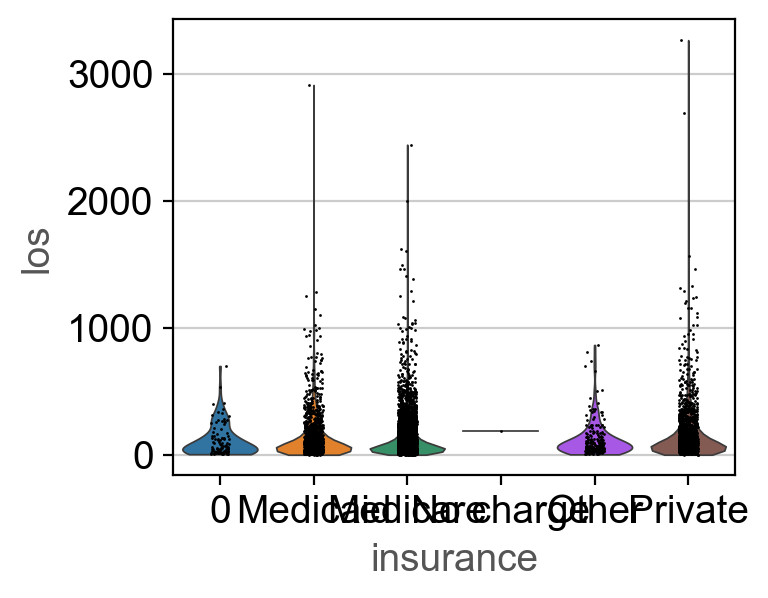

In [125]:
ep.settings.set_figure_params(figsize=(4, 3), dpi=100)
ep.pl.violin(adata, keys=["los"], groupby="insurance")

In [126]:
obs_metric, var_metrics = ep.pp.qc_metrics(adata)

In [127]:
obs_metric

missing_values_abs  missing_values_pct
stay_id                                         
39698942                   0            0.000000
33685454                  15            9.933775
31090461                  21           13.907285
32358465                  18           11.920530
33987268                  15            9.933775
...                      ...                 ...
37403074                   0            0.000000
32641669                  15            9.933775
30532790                  66           43.708609
37692584                  21           13.907285
31070865                  12            7.947020

[9864 rows x 2 columns]

In [136]:
var_metrics

missing_values_abs  \
ehrapycat_gender_F                                                  0   
ehrapycat_gender_M                                                  0   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE                   0   
ehrapycat_ethnicity_ASIAN                                           0   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                            0   
...                                                               ...   
Total Bilirubin_mean                                             3314   
Total Bilirubin_min                                              3314   
WBC_max                                                           305   
WBC_mean                                                          305   
WBC_min                                                           305   

                                                   missing_values_pct  \
ehrapycat_gender_F                                           0.000000   
ehrapycat_gender_M                                           0.000000   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE            0.000000   
ehrapycat_ethnicity_ASIAN                                    0.000000   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                     0.000000   
...                                                               ...   
Total Bilirubin_mean                                        33.596918   
Total Bilirubin_min                                         33.596918   
WBC_max                                                      3.092052   
WBC_mean                                                     3.092052   
WBC_min                                                      3.092052   

                                                        mean  \
ehrapycat_gender_F                                       NaN   
ehrapycat_gender_M                                       NaN   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE        NaN   
ehrapycat_ethnicity_ASIAN                                NaN   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                 NaN   
...                                                      ...   
Total Bilirubin_mean                                2.113450   
Total Bilirubin_min                                 1.666305   
WBC_max                                            16.070771   
WBC_mean                                           12.504984   
WBC_min                                             9.789985   

                                                   median  \
ehrapycat_gender_F                                    NaN   
ehrapycat_gender_M                                    NaN   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE     NaN   
ehrapycat_ethnicity_ASIAN                             NaN   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN              NaN   
...                                                   ...   
Total Bilirubin_mean                                0.600   
Total Bilirubin_min                                 0.500   
WBC_max                                            14.200   
WBC_mean                                           11.325   
WBC_min                                             8.700   

                                                   standard_deviation  \
ehrapycat_gender_F                                                NaN   
ehrapycat_gender_M                                                NaN   
ehrapycat_ethnicity_AMERICAN INDIAN/ALASKA NATIVE                 NaN   
ehrapycat_ethnicity_ASIAN                                         NaN   
ehrapycat_ethnicity_ASIAN - ASIAN INDIAN                          NaN   
...                                                               ...   
Total Bilirubin_mean                                         4.895871   
Total Bilirubin_min                                          4.209673   
WBC_max                                                      9.212822   
WBC_mean                                                     6.87

In [129]:
adata.obs.head(4)

subject_id               intime  \
stay_id                                     
39698942    10001843  2134-12-05 18:50:03   
33685454    10002155  2129-08-04 12:45:00   
31090461    10002155  2130-09-24 00:50:00   
32358465    10002155  2131-03-09 21:33:00   

                      outtime   hadm_id  has_J18  \
stay_id                                            
39698942  2134-12-06 14:38:26  26133978        1   
33685454  2129-08-10 17:02:38  23822395        1   
31090461  2130-09-27 22:13:41  28994087        1   
32358465  2131-03-10 18:09:21  20345487        1   

                          dod ethnicity insurance  \
stay_id                                             
39698942  2134-12-06 00:00:00     WHITE  Medicare   
33685454  2131-03-10 00:00:00     WHITE  Medicare   
31090461  2131-03-10 00:00:00     WHITE  Medicare   
32358465  2131-03-10 00:00:00     WHITE  Medicare   

          missing_values_abs  missing_values_pct  \
stay_id                                            
39698942                   0            0.000000   
33685454                  15            9.933775   
31090461                  21           13.907285   
32358465                  18           11.920530   

         gender  
stay_id          
39698942      M  
33685454      F  
31090461      F  
32358465      F

In [134]:
adata.obs.loc[
    adata.obs["missing_values_pct"] == adata.obs["missing_values_pct"].max(), :
]

subject_id               intime  \
stay_id                                     
39369369    11803145  2159-01-20 02:44:08   
34834040    15825799  2131-04-18 20:14:16   

                      outtime   hadm_id  \
stay_id                                   
39369369  2159-01-20 04:17:31  23162521   
34834040  2131-04-18 23:47:54  21768010   

          has_J18                  dod  \
stay_id                                  
39369369        1  2159-02-04 00:00:00   
34834040        1  2131-04-18 00:00:00   

                       ethnicity  \
stay_id                            
39369369                   WHITE   
34834040  BLACK/AFRICAN AMERICAN   

         insurance  missing_values_abs  \
stay_id                                  
39369369  Medicaid                  87   
34834040  Medicare                  87   

          missing_values_pct gender  
stay_id                              
39369369           57.615894      F  
34834040           57.615894      F

In [135]:
adata.var.loc[
    adata.var["missing_values_pct"] == adata.var["missing_values_pct"].max(), :
]

feature_type  \
Alkaline Phosphate_max       numeric   
Alkaline Phosphate_mean      numeric   
Alkaline Phosphate_min       numeric   

                             unencoded_var_names  \
Alkaline Phosphate_max    Alkaline Phosphate_max   
Alkaline Phosphate_mean  Alkaline Phosphate_mean   
Alkaline Phosphate_min    Alkaline Phosphate_min   

                        encoding_mode  \
Alkaline Phosphate_max            NaN   
Alkaline Phosphate_mean           NaN   
Alkaline Phosphate_min            NaN   

                         missing_values_abs  \
Alkaline Phosphate_max                 3377   
Alkaline Phosphate_mean                3377   
Alkaline Phosphate_min                 3377   

                         missing_values_pct  \
Alkaline Phosphate_max            34.235604   
Alkaline Phosphate_mean           34.235604   
Alkaline Phosphate_min            34.235604   

                               mean  \
Alkaline Phosphate_max   149.693695   
Alkaline Phosphate_mean  128.955392   
Alkaline Phosphate_min   111.976569   

                         median  \
Alkaline Phosphate_max    103.0   
Alkaline Phosphate_mean    94.0   
Alkaline Phosphate_min     83.0   

                         standard_deviation  \
Alkaline Phosphate_max           138.580250   
Alkaline Phosphate_mean          114.085644   
Alkaline Phosphate_min           102.402855   

                          min    max  \
Alkaline Phosphate_max   35.0  853.0   
Alkaline Phosphate_mean  35.0  853.0   
Alkaline Phosphate_min   35.0  853.0   

                         iqr_outliers  
Alkaline Phosphate_max           True  
Alkaline Phosphate_mean          True  
Alkaline Phosphate_min           True

[Text(0.5, 1.0, 'pct of missing values: var')]

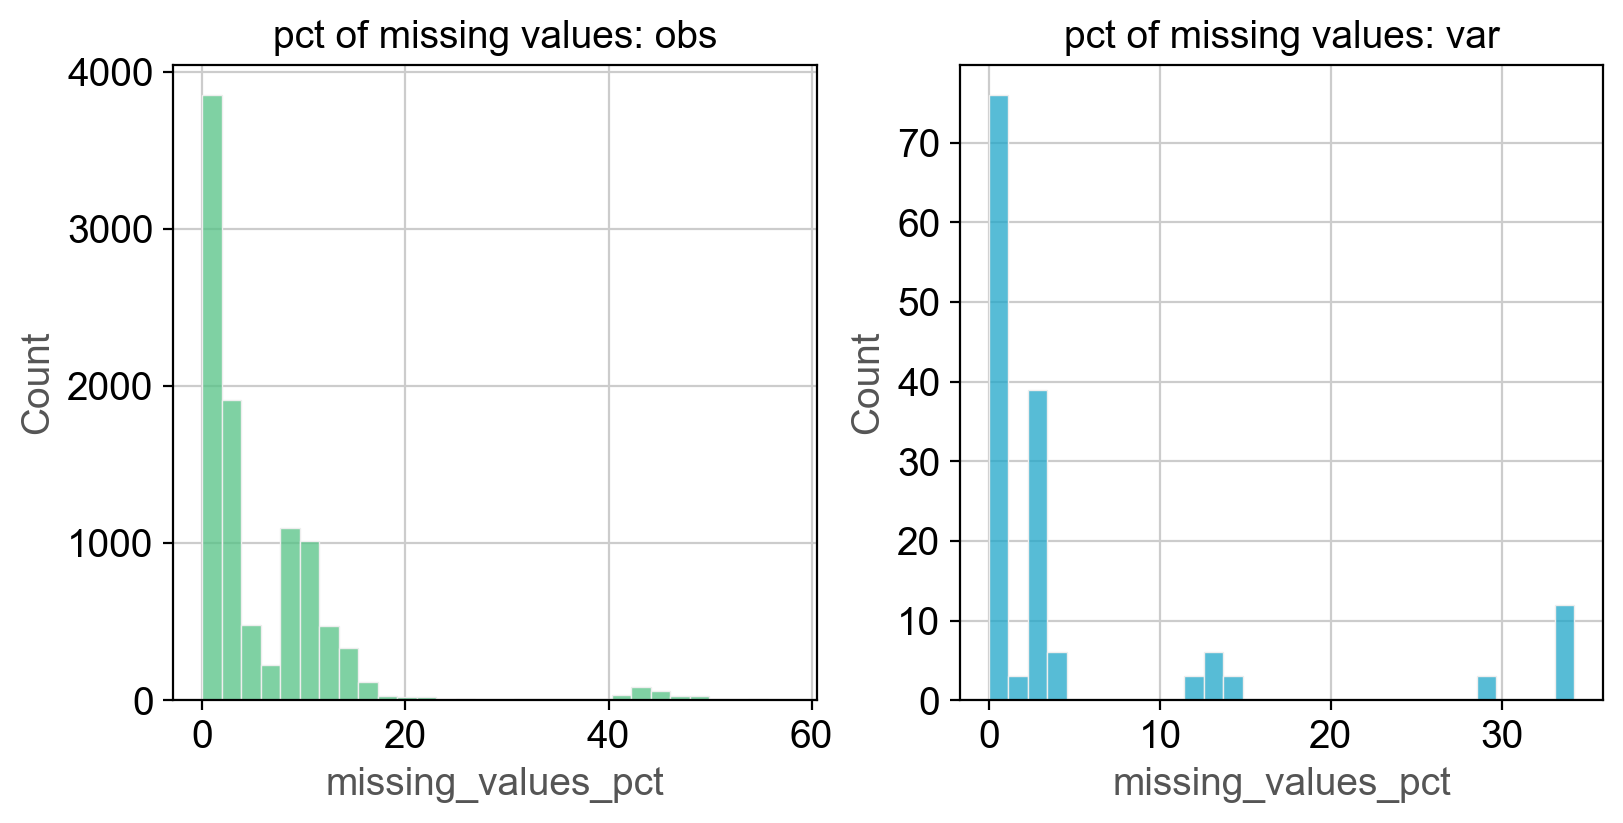

In [130]:
axd = plt.figure(constrained_layout=True, figsize=(8, 4), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(
    adata.obs["missing_values_pct"], ax=axd["A"], bins=30, color="#54C285"
).set(title="pct of missing values: obs")
sns.histplot(
    adata.var["missing_values_pct"], ax=axd["B"], bins=30, color="#1FA6C9"
).set(title="pct of missing values: var")

Lets use KNN algo to replace missing

In [137]:
ep.pp.knn_impute(adata, n_neighbours=5)

Performing KNN impute ⠹


In [139]:
ep.pp.qc_metrics(adata)

(          missing_values_abs  \
 stay_id                        
 39698942                   0   
 33685454                   0   
 31090461                   0   
 32358465                   0   
 33987268                   0   
 ...                      ...   
 37403074                   0   
 32641669                   0   
 30532790                   0   
 37692584                   0   
 31070865                   0   
 
           missing_values_pct  
 stay_id                       
 39698942                 0.0  
 33685454                 0.0  
 31090461                 0.0  
 32358465                 0.0  
 33987268                 0.0  
 ...                      ...  
 37403074                 0.0  
 32641669                 0.0  
 30532790                 0.0  
 37692584                 0.0  
 31070865                 0.0  
 
 [9864 rows x 2 columns],
                                                    missing_values_abs  \
 ehrapycat_gender_F                                

[Text(0.5, 1.0, 'pct of missing values: var'), (0.0, 30.0)]

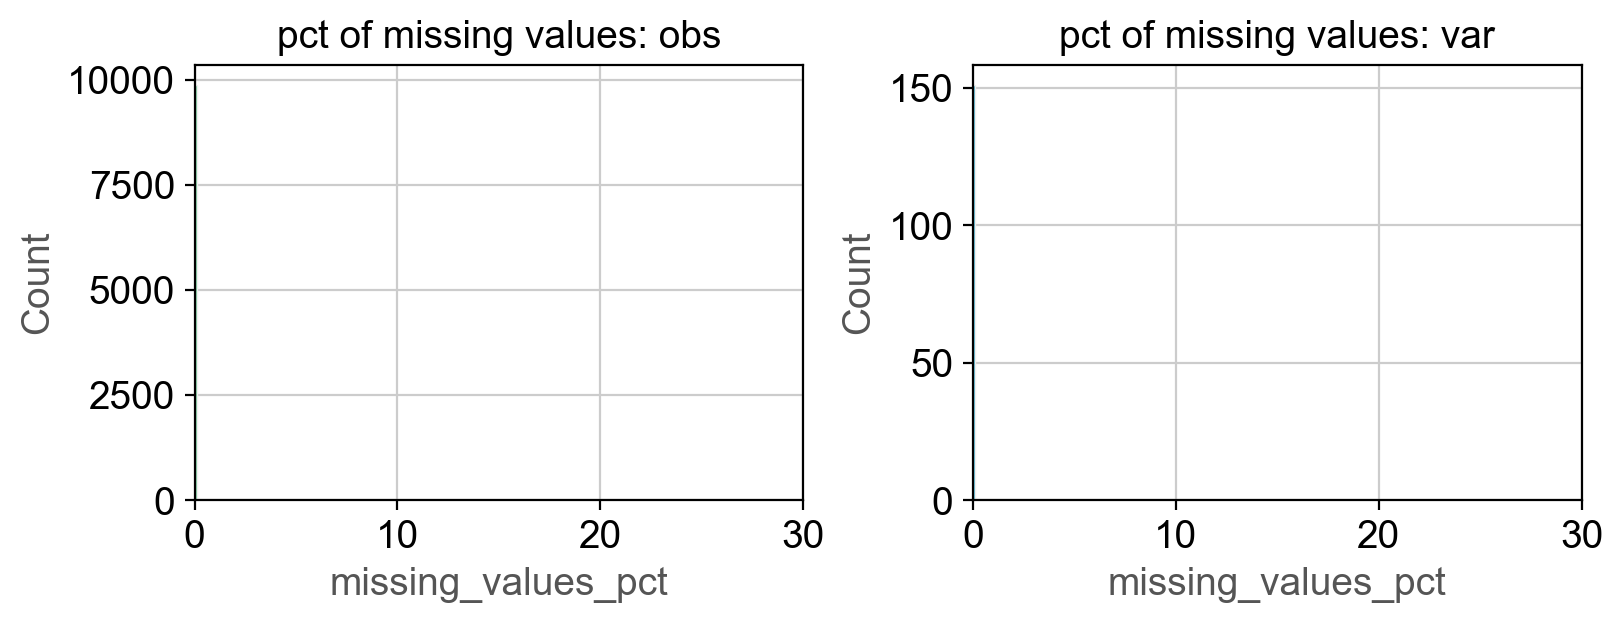

In [141]:
axd = plt.figure(constrained_layout=True, figsize=(8, 3), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(adata.obs["missing_values_pct"], ax=axd["A"], bins=5, color="#54C285").set(
    title="pct of missing values: obs", xlim=(0, 30)
)
sns.histplot(adata.var["missing_values_pct"], ax=axd["B"], bins=5, color="#1FA6C9").set(
    title="pct of missing values: var", xlim=(0, 30)
)

Depending on the measurement and the unit of a measurement the value ranges of features may be huge. Clusterings and differential comparisons especially may be greatly influenced by exceptionally big values. Moreover, features which have a very high coefficient of variation can strongly influence dimensionality reduction. However, since the coefficient of variation performs weak with features that have small means, we only select those which have no small mean.

[Text(0.5, 1.0, 'maximum values')]

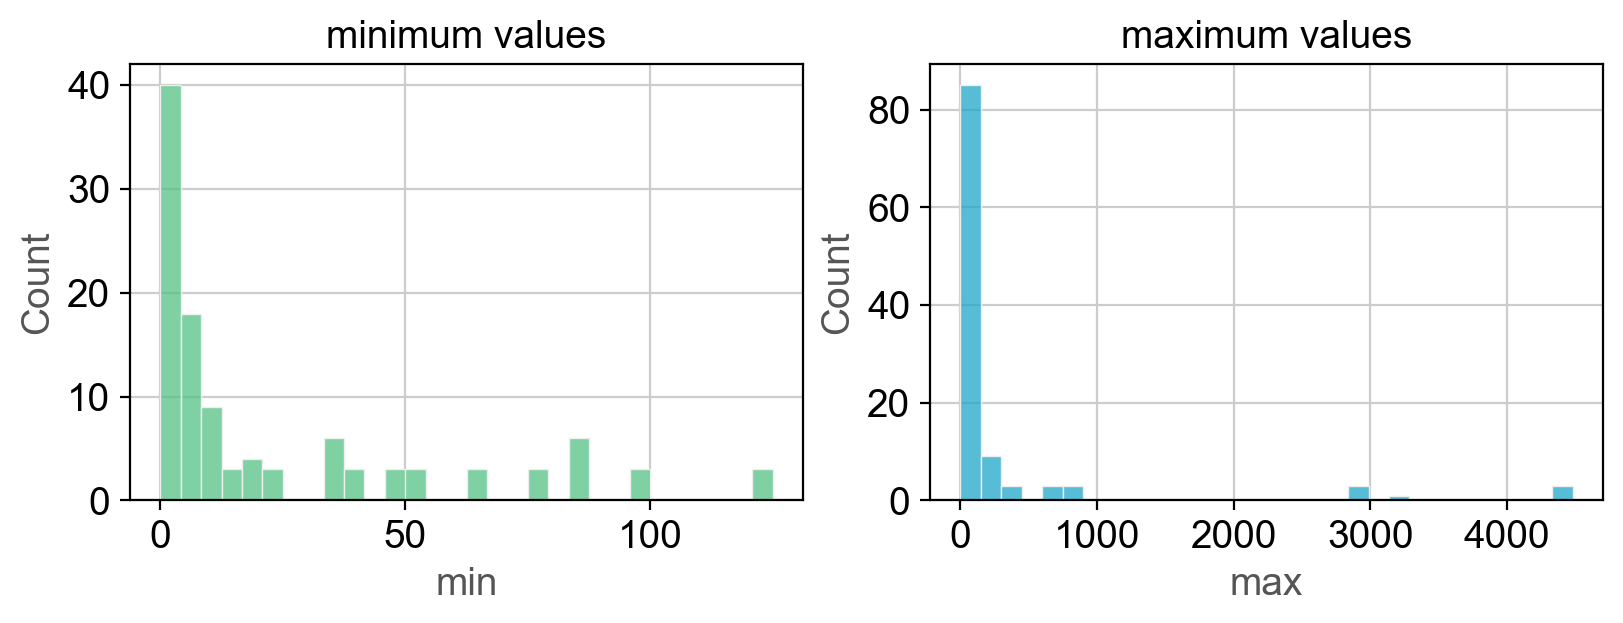

In [142]:
axd = plt.figure(constrained_layout=True, figsize=(8, 3), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(adata.var["min"], ax=axd["A"], bins=30, color="#54C285").set(
    title="minimum values"
)
sns.histplot(adata.var["max"], ax=axd["B"], bins=30, color="#1FA6C9").set(
    title="maximum values"
)

In [143]:
adata.var["coefficient.variation"] = (
    adata.var["standard_deviation"] / adata.var["mean"]
) * 100

Where do we need normalization?

In [146]:
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] > 50),]

feature_type  \
los                          numeric   
ALT_max                      numeric   
ALT_mean                     numeric   
ALT_min                      numeric   
AST_max                      numeric   
AST_mean                     numeric   
AST_min                      numeric   
Alkaline Phosphate_max       numeric   
Alkaline Phosphate_mean      numeric   
Alkaline Phosphate_min       numeric   
PTT_max                      numeric   
Platelet Count_max           numeric   
Platelet Count_mean          numeric   
Platelet Count_min           numeric   

                             unencoded_var_names  \
los                                          los   
ALT_max                                  ALT_max   
ALT_mean                                ALT_mean   
ALT_min                                  ALT_min   
AST_max                                  AST_max   
AST_mean                                AST_mean   
AST_min                                  AST_min   
Alkaline Phosphate_max    Alkaline Phosphate_max   
Alkaline Phosphate_mean  Alkaline Phosphate_mean   
Alkaline Phosphate_min    Alkaline Phosphate_min   
PTT_max                                  PTT_max   
Platelet Count_max            Platelet Count_max   
Platelet Count_mean          Platelet Count_mean   
Platelet Count_min            Platelet Count_min   

                        encoding_mode  \
los                               NaN   
ALT_max                           NaN   
ALT_mean                          NaN   
ALT_min                           NaN   
AST_max                           NaN   
AST_mean                          NaN   
AST_min                           NaN   
Alkaline Phosphate_max            NaN   
Alkaline Phosphate_mean           NaN   
Alkaline Phosphate_min            NaN   
PTT_max                           NaN   
Platelet Count_max                NaN   
Platelet Count_mean               NaN   
Platelet Count_min                NaN   

                         missing_values_abs  \
los                                       0   
ALT_max                                   0   
ALT_mean                                  0   
ALT_min                                   0   
AST_max                                   0   
AST_mean                                  0   
AST_min                                   0   
Alkaline Phosphate_max                    0   
Alkaline Phosphate_mean                   0   
Alkaline Phosphate_min                    0   
PTT_max                                   0   
Platelet Count_max                        0   
Platelet Count_mean                       0   
Platelet Count_min                        0   

                         missing_values_pct  \
los                                     0.0   
ALT_max                                 0.0   
ALT_mean                                0.0   
ALT_min                                 0.0   
AST_max                                 0.0   
AST_mean                                0.0   
AST_min                                 0.0   
Alkaline Phosphate_max                  0.0   
Alkaline Phosphate_mean                 0.0   
Alkaline Phosphate_min                  0.0   
PTT_max                                 0.0   
Platelet Count_max                      0.0   
Platelet Count_mean                     0.0   
Platelet Count_min                      0.0   

                               mean  \
los                      119.528114   
ALT_max                  137.658313   
ALT_mean                  93.550589   
ALT_min                   59.948155   
AST_max                  230.798824   
AST_mean                 135.041522   
AST_min                   76.821938   
Alkaline Phosphate_max   142.708800   
Alkaline Phosphate_mean  124.107970   
Alkaline Phosphate_min   108.067214   
PTT_max                   54.325600   
Platelet Count_max       261.935128   
Platelet Count_mean      218.807053   
Platelet Count_min       185.790693   

                            

In [149]:
ep.pp.log_norm(adata, vars=['los', "Platelet Count_max", "Platelet Count_mean", "Platelet Count_min"], offset=1)
ep.pp.minmax_norm(adata, vars=['ALT_max', 'ALT_mean', 'ALT_min', 'AST_min', 'AST_max', 'AST_mean', 'Alkaline Phosphate_max', 'Alkaline Phosphate_mean', 'Alkaline Phosphate_min', 'PTT_min', 'PTT_mean', 'PTT_max'])

In [ ]:
# after normalization lets calculate QC meterics again and check distribution
ep.pp.qc_metrics(adata)

In [151]:
adata.var["coefficient.variation"] = (
    adata.var["standard_deviation"] / adata.var["mean"]
) * 100
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] > 50),]

Empty DataFrame
Columns: [feature_type, unencoded_var_names, encoding_mode, missing_values_abs, missing_values_pct, mean, median, standard_deviation, min, max, iqr_outliers, coefficient.variation]
Index: []

In [152]:
ep.pp.pca(adata)

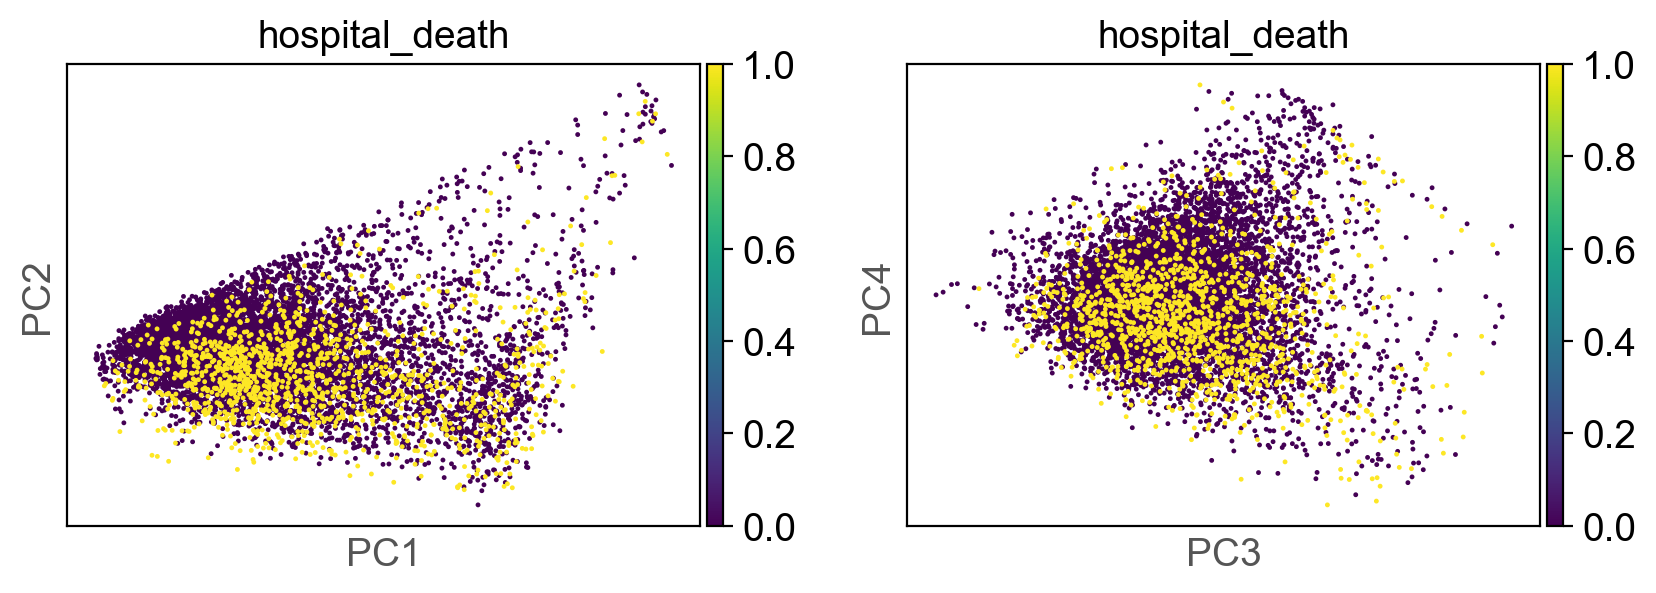

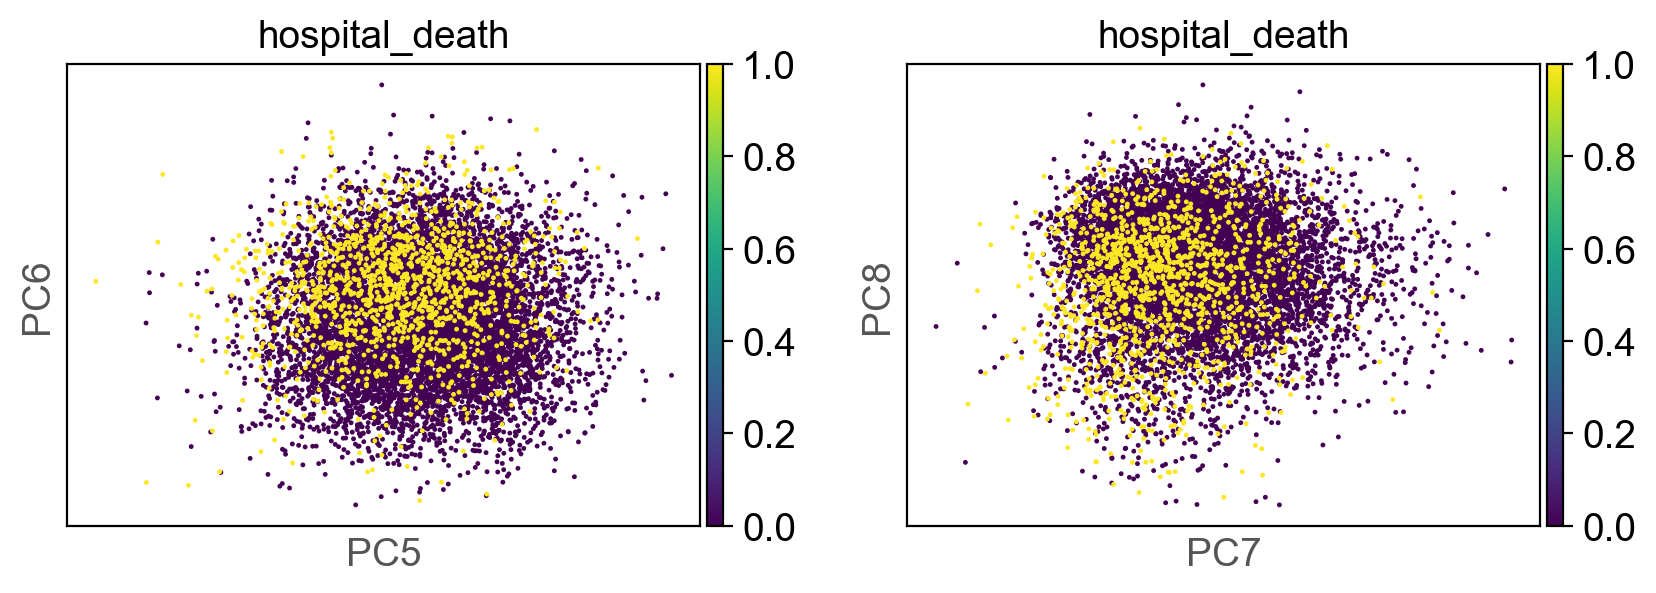

In [155]:
ep.pl.pca(adata, color="hospital_death", components=["1,2", "3,4"])
ep.pl.pca(adata, color="hospital_death", components=["5,6", "7,8"])

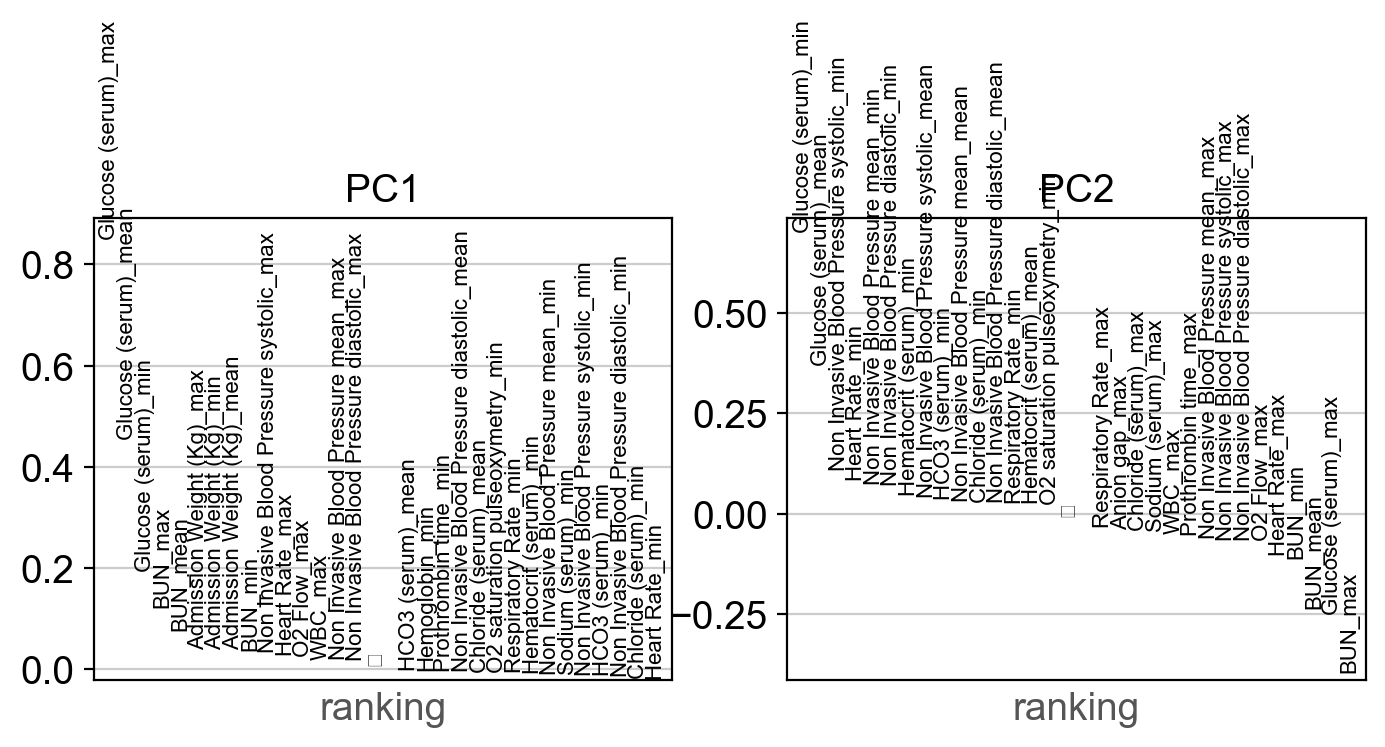

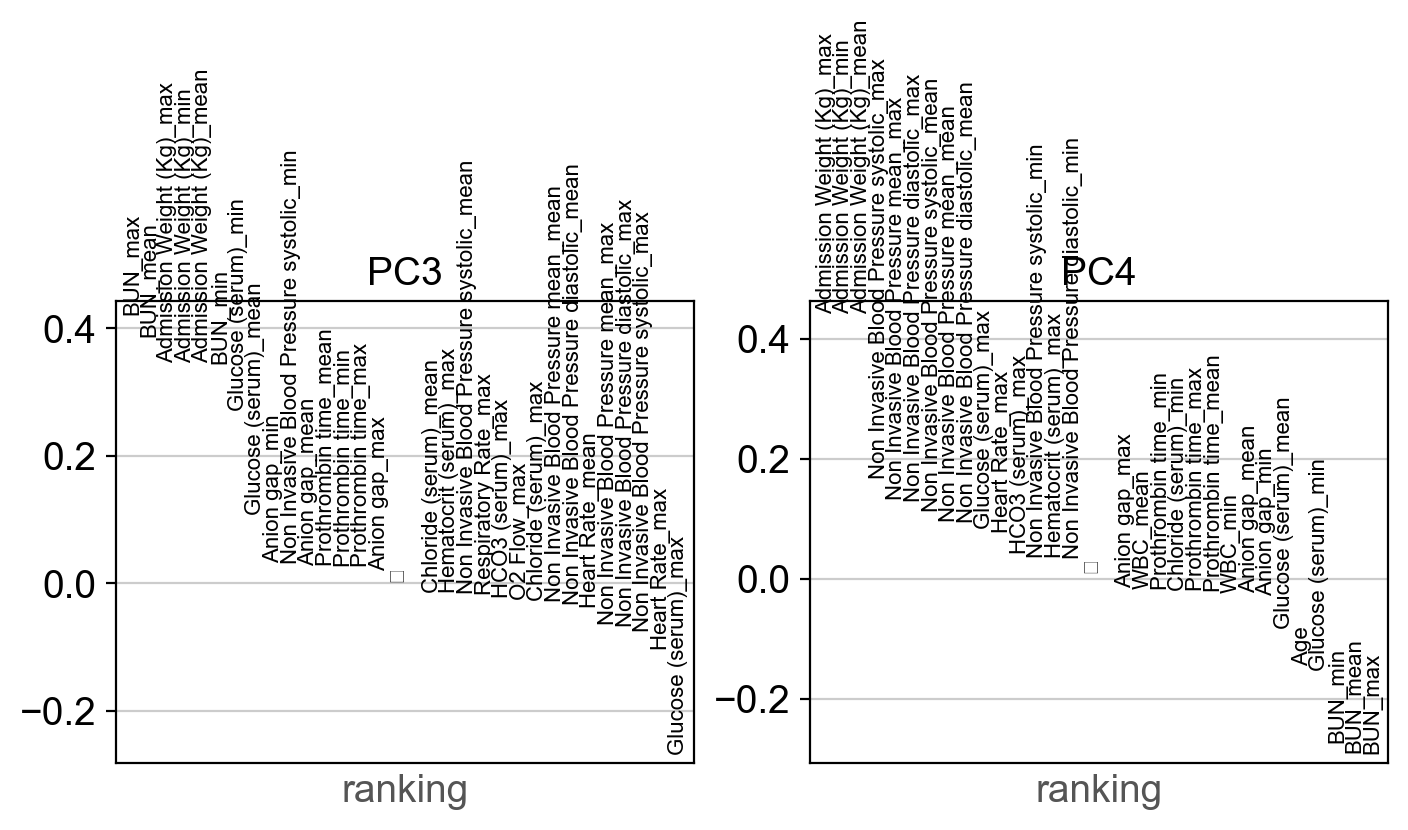

In [156]:
ep.pl.pca_loadings(adata, components="1, 2")
ep.pl.pca_loadings(adata, components="3, 4")

In [157]:
ep.pp.neighbors(adata, n_pcs=10)

In [158]:
ep.tl.umap(adata)

In [ ]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=[
        "gender",
        "intime",
    ],
    wspace=0.5,
    size=20,
    title=["gender", "intime"],
)

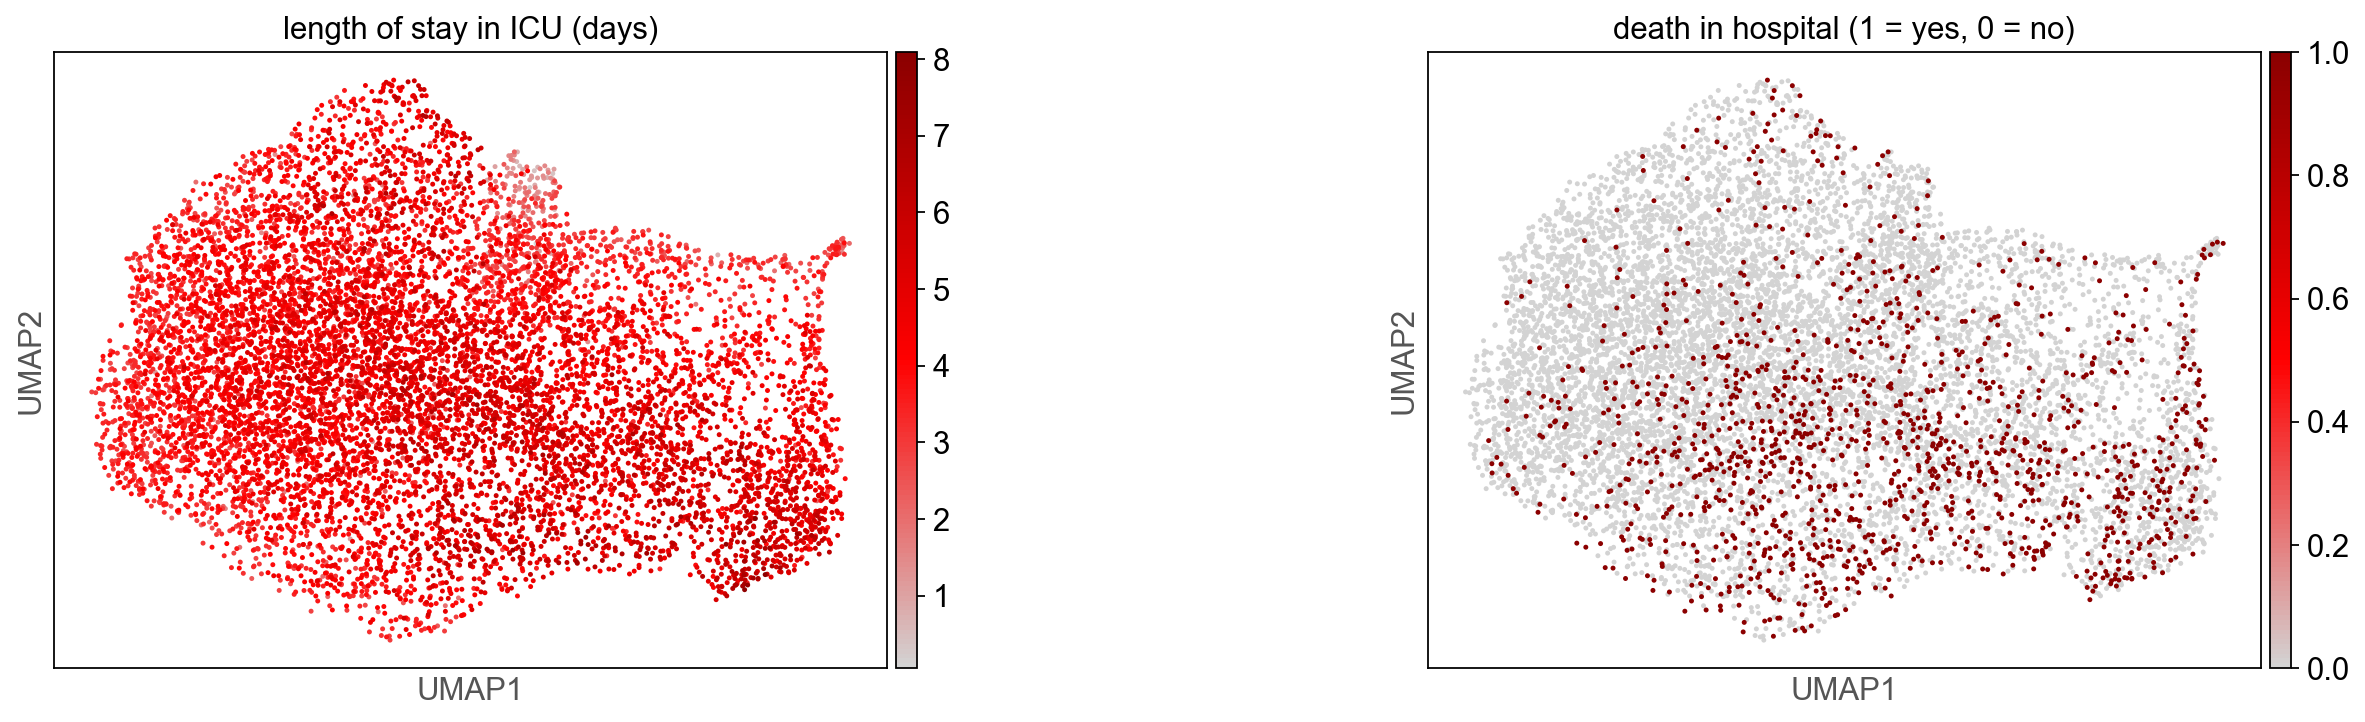

In [161]:
ep.pl.umap(
    adata,
    color=["los", "hospital_death"],
    wspace=0.5,
    size=20,
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["length of stay in ICU (days)", "death in hospital (1 = yes, 0 = no)"],
)

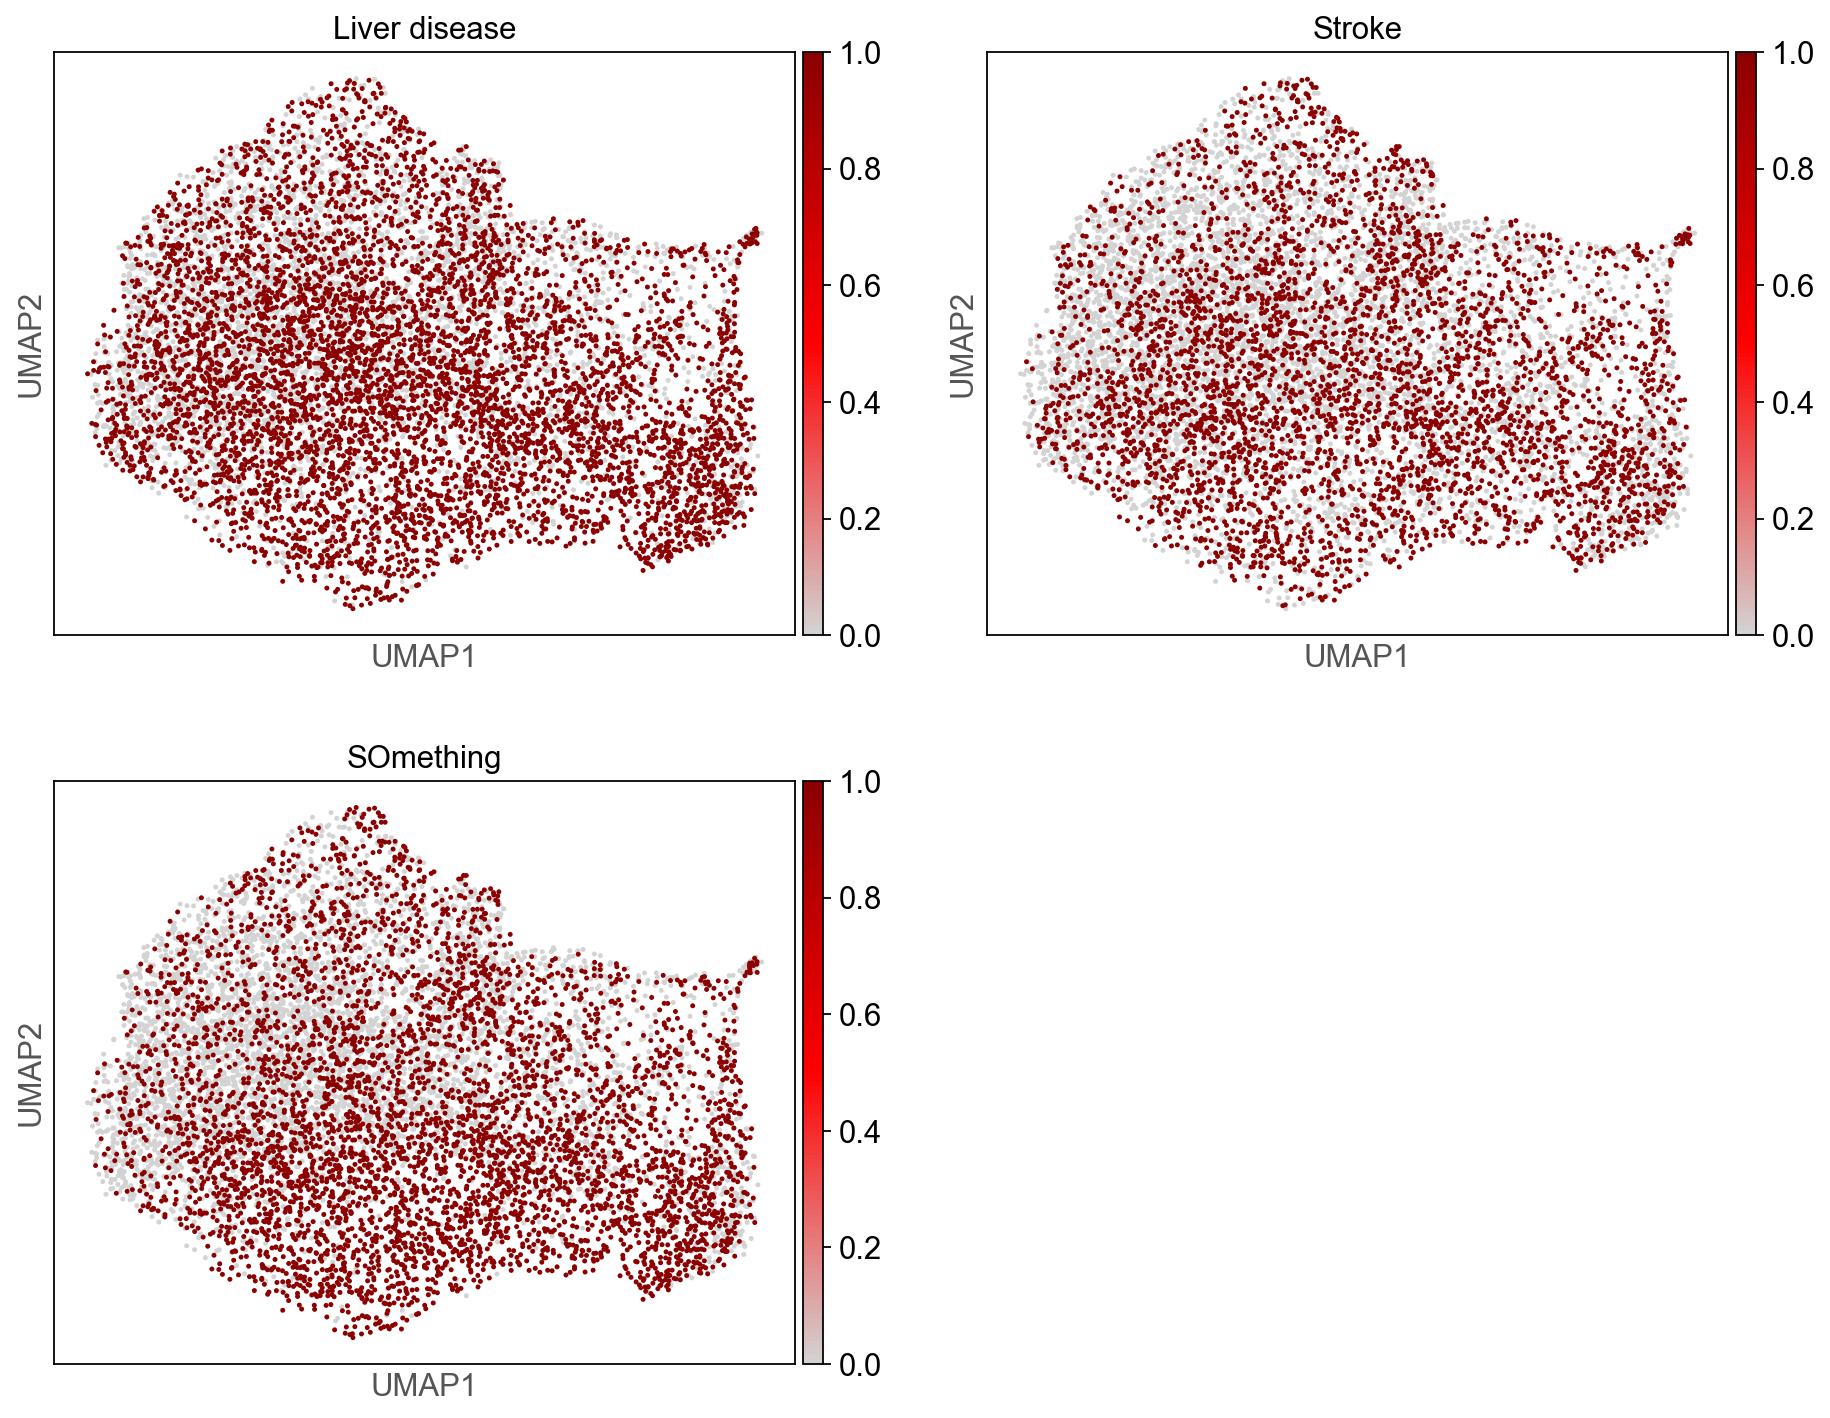

In [162]:
# comorbidities
ep.pl.umap(
    adata,
    color=["has_E87", "has_I50", "has_N17"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Liver disease", "Stroke", "SOmething"],
    ncols=2,
    size=20,
)

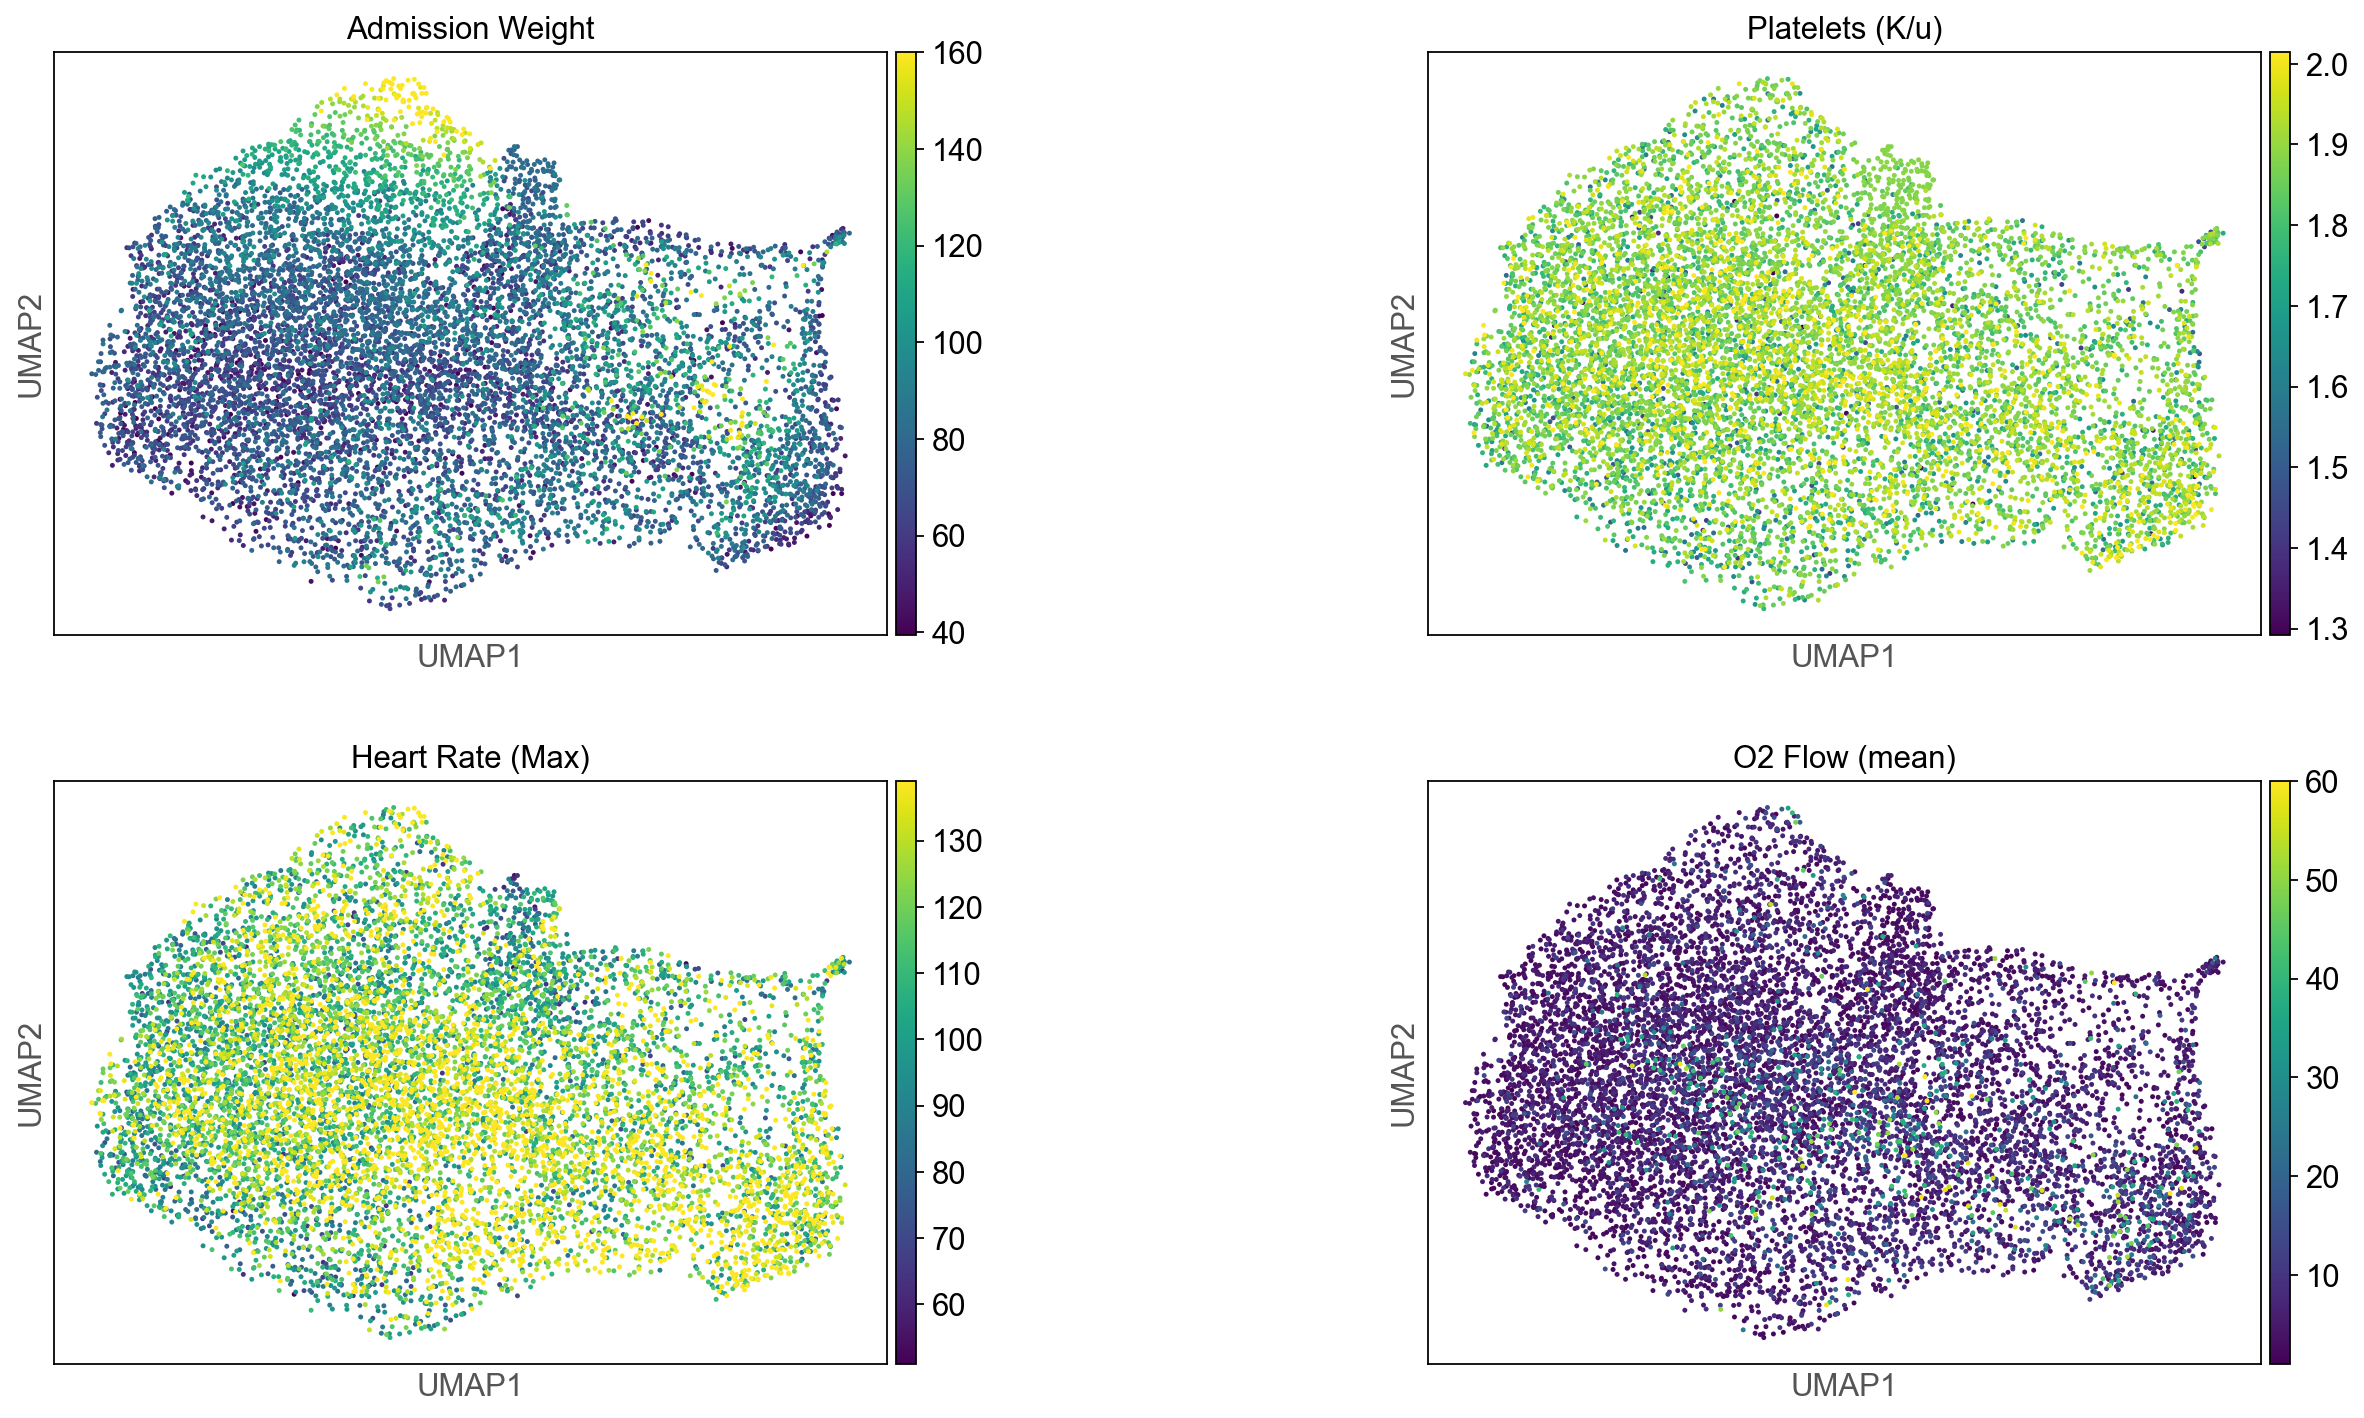

In [163]:
# lab parameters
# 
ep.pl.umap(
    adata,
    color=["Admission Weight (Kg)_mean", "Platelet Count_max", "Heart Rate_max", "O2 Flow_mean"],
    wspace=0.5,
    ncols=2,
    size=20,
    title=["Admission Weight", "Platelets (K/u)", "Heart Rate (Max)", "O2 Flow (mean)"],
)

###  Cluster Analysis

To make more sense of the embedding it is often times useful to determine clusters through e.g. community detection as implemented in the Leiden algorithm. Moreover, clustering allows for unbiased detection of features that are changed between clusters and therefore intersting for us.

Cluster identification
The implementation in ehrapy allows for the setting of a resolution which determines the number of found clusters. It is often times useful to play around with the parameter.

In [164]:
#The leiden algorithm added a key to obs (leiden_0_3) that stores the clusters. 
# These can subsequently be visualized in the UMAP embedding.
ep.tl.leiden(adata, resolution=0.3, key_added="leiden_0_3")


In [165]:
adata.obs.head(4)

subject_id               intime  \
stay_id                                     
39698942    10001843  2134-12-05 18:50:03   
33685454    10002155  2129-08-04 12:45:00   
31090461    10002155  2130-09-24 00:50:00   
32358465    10002155  2131-03-09 21:33:00   

                      outtime   hadm_id  \
stay_id                                   
39698942  2134-12-06 14:38:26  26133978   
33685454  2129-08-10 17:02:38  23822395   
31090461  2130-09-27 22:13:41  28994087   
32358465  2131-03-10 18:09:21  20345487   

          has_J18                  dod  \
stay_id                                  
39698942        1  2134-12-06 00:00:00   
33685454        1  2131-03-10 00:00:00   
31090461        1  2131-03-10 00:00:00   
32358465        1  2131-03-10 00:00:00   

         ethnicity insurance  \
stay_id                        
39698942     WHITE  Medicare   
33685454     WHITE  Medicare   
31090461     WHITE  Medicare   
32358465     WHITE  Medicare   

          missing_values_abs  \
stay_id                        
39698942                   0   
33685454                   0   
31090461                   0   
32358465                   0   

          missing_values_pct gender  \
stay_id                               
39698942                 0.0      M   
33685454                 0.0      F   
31090461                 0.0      F   
32358465                 0.0      F   

         leiden_0_3  
stay_id              
39698942          0  
33685454          0  
31090461          0  
32358465          3

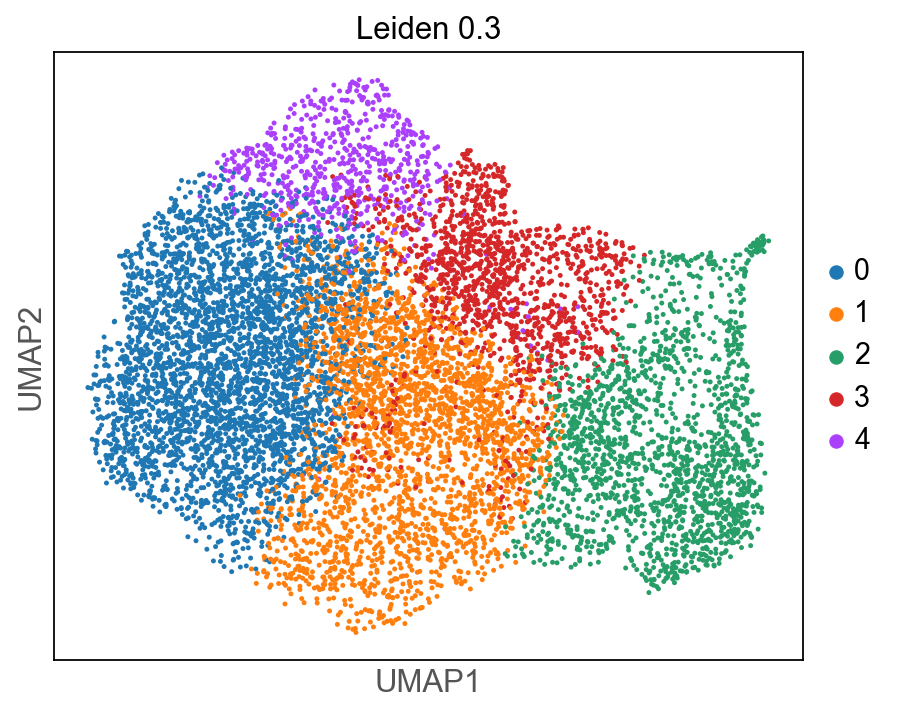

In [166]:
ep.pl.umap(adata, color=["leiden_0_3"], title="Leiden 0.3", size=20)

Next, we can explore certain features which are special for certrain clusters and could therefore be used for annotation.

Cluster features
To identify cluster-specific markers, ehrapy provides the ep.tl.rank_features_groups() function, which allows statistical tests between the cluster groups to determine significantly enriched or lowered values.

In [167]:
ep.tl.rank_features_groups(adata, groupby="leiden_0_3")

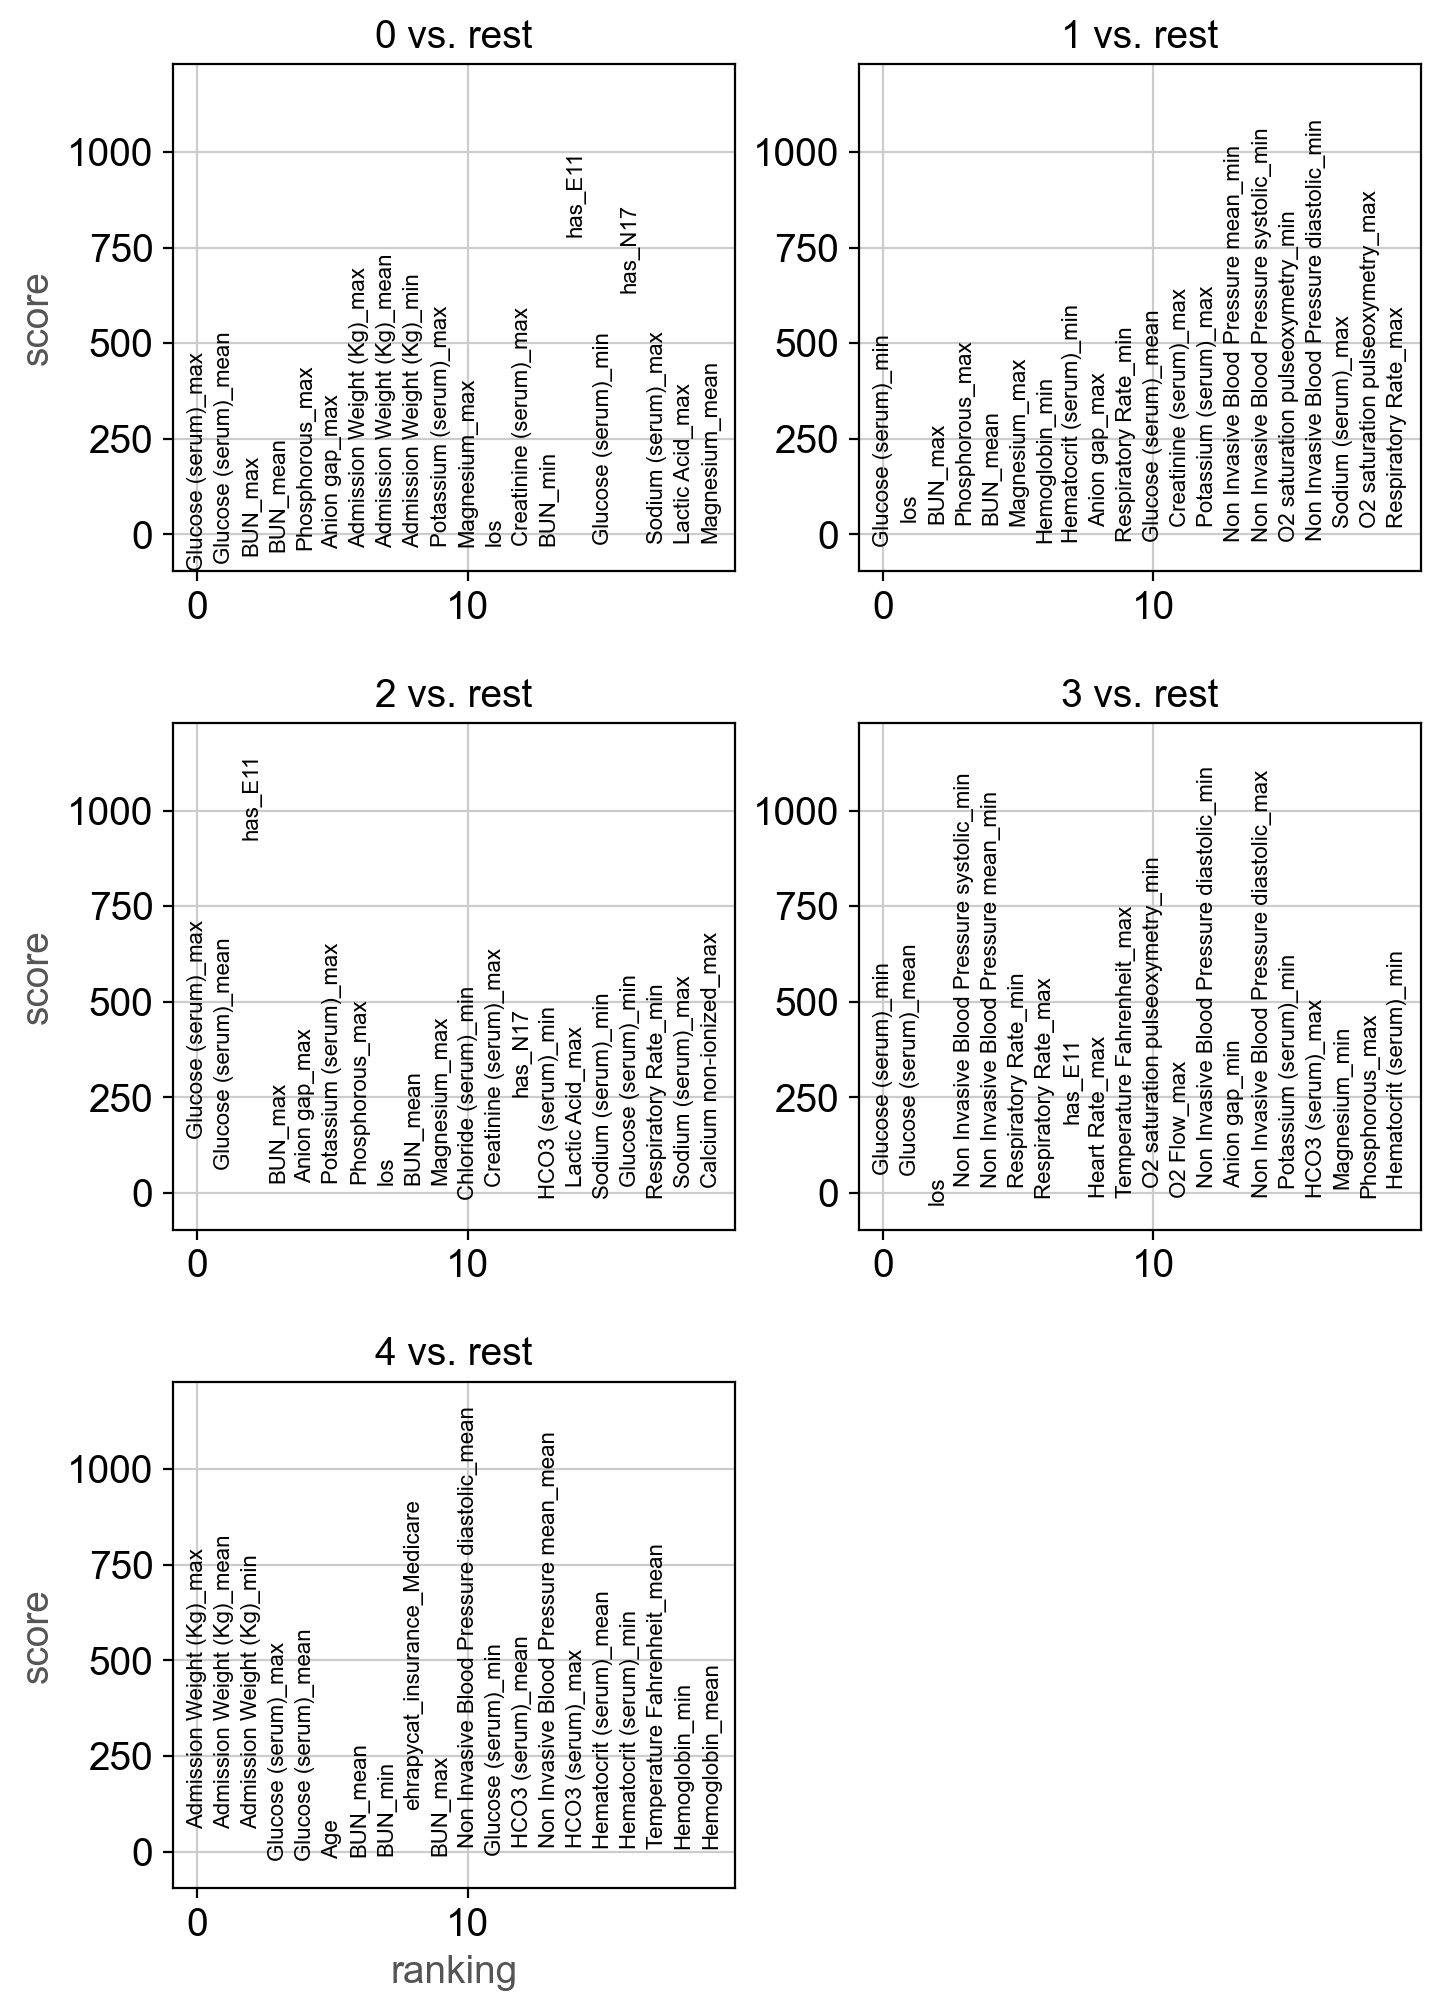

In [168]:
ep.settings.set_figure_params(figsize=(4, 4), dpi=100)
ep.pl.rank_features_groups(adata, key="rank_features_groups", ncols=2)

We can also get the top features per cluster as a DataFrame.

In [184]:
df = ep.ad.get_rank_features_df(adata, group=["0", "1", "2", "3", "4"])
df = df.loc[(df["logfoldchanges"] > 0) & (df["pvals_adj"] < 0.05),]



In [186]:
df.to_csv('./notebooks/tables/topfeaturespercluster.csv')

E.g. we can check the top marker of cluster 2.

Since all your patients had pneumonia, ARDS is a major concern, especially in Cluster 1, where non-invasive ventilation and oxygenation issues are dominant. These patients may have severe lung injury requiring aggressive respiratory support.

In [183]:
df.loc[df["group"] == "1",]

group  \
152     1   
153     1   
154     1   
155     1   
156     1   
..    ...   
247     1   
248     1   
249     1   
250     1   
251     1   

                                            names  \
152                                           los   
153                                       BUN_max   
154                               Phosphorous_max   
155                                      BUN_mean   
156                                 Magnesium_max   
..                                            ...   
247                   ehrapycat_ethnicity_UNKNOWN   
248                                      ALT_mean   
249                                       has_I25   
250                  ehrapycat_insurance_Medicaid   
251  ehrapycat_ethnicity_ASIAN - SOUTH EAST ASIAN   

        scores  logfoldchanges  \
152  33.669285        1.042481   
153  28.472397       29.756138   
154  24.043242        1.322260   
155  23.836235       20.416224   
156  22.962170        0.315141   
..         ...             ...   
247   6.862959        1.000000   
248   2.611392        0.239627   
249   6.319647        1.000000   
250   5.383756        1.000000   
251   5.108109        1.000000   

             pvals      pvals_adj  
152  1.697026e-224  1.281255e-222  
153  9.255975e-162  4.658841e-160  
154  5.557238e-120  2.097857e-118  
155  1.519785e-116  4.589751e-115  
156  6.328031e-111  1.592554e-109  
..             ...            ...  
247   8.800073e-03   1.369908e-02  
248   9.053055e-03   1.394909e-02  
249   1.194074e-02   1.821264e-02  
250   2.032508e-02   3.069087e-02  
251   2.381426e-02   3.560350e-02  

[69 rows x 6 columns]

Cluster 0: Diabetic kidney failure + high mortality.

Cluster 1: Severe pneumonia/ARDS with respiratory failure.

Cluster 2: Sepsis with multi-organ dysfunction.

Cluster 3: Shock (septic/cardiogenic) + cardiopulmonary failure.

Cluster 4: Elderly, frail, chronic illness burden.

In [197]:
adata.obs["annotation"] = "NA"
annotation = {
    "0": "Diabetes+/kidney++/mortality+",
    "1": "Glucose+/ARDS/BP+/COPD+",
    "2": "Sepsis+/electrolyte+/lactic-acidosis+/multi-orgysfunction",
    "3": "Kidney+/cardiopulmonary+",
    "4": "Age+/weight+/chronic-illness+/deceased+",
}

In [198]:
adata.obs["annotation"] = [
    annotation[l] if l in annotation.keys() else l for l in adata.obs["leiden_0_3"]
]

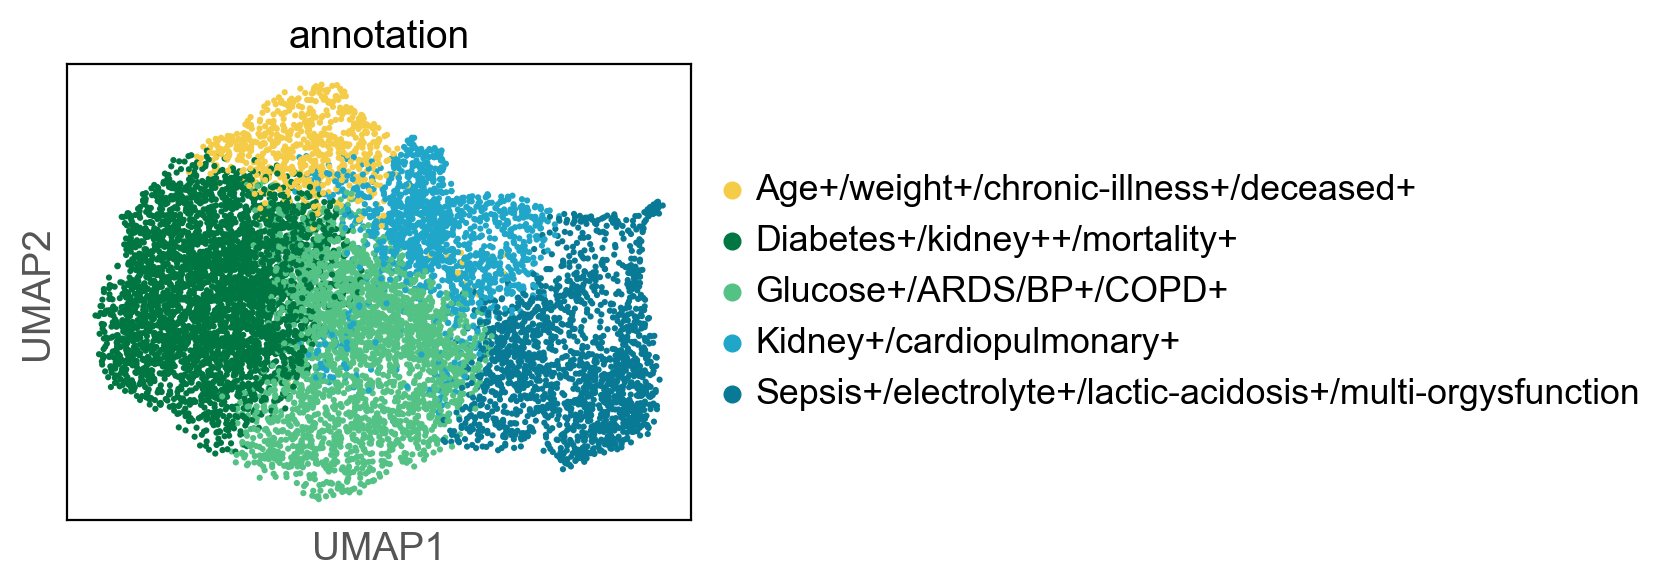

In [199]:
ep.settings.set_figure_params(figsize=(4, 3), dpi=100)
ep.pl.umap(
    adata,
    color="annotation",
    size=20,
    palette={
        "Diabetes+/kidney++/mortality+": "#007742",
        "Glucose+/ARDS/BP+/COPD+": "#54C285",
        "Sepsis+/electrolyte+/lactic-acidosis+/multi-orgysfunction": "#087A96",
        "Kidney+/cardiopulmonary+": "#1FA6C9",
        "Age+/weight+/chronic-illness+/deceased+": "#F4CC47",
        
    },
)

In [179]:
# top features in every cluster
top_features = df.groupby("group").head(5)
top_features = pd.Series(top_features["names"].unique())
top_features

0                                        has_E11
1                                        has_N17
2                               HCO3 (serum)_min
3                           Chloride (serum)_min
4                O2 saturation pulseoxymetry_min
5                                            los
6                                        BUN_max
7                                Phosphorous_max
8                                       BUN_mean
9                                  Magnesium_max
10                           Glucose (serum)_max
11                          Glucose (serum)_mean
12                                 Anion gap_max
13                           Glucose (serum)_min
14      Non Invasive Blood Pressure systolic_min
15          Non Invasive Blood Pressure mean_min
16                          Respiratory Rate_min
17                     Admission Weight (Kg)_max
18                    Admission Weight (Kg)_mean
19                     Admission Weight (Kg)_min
20                  

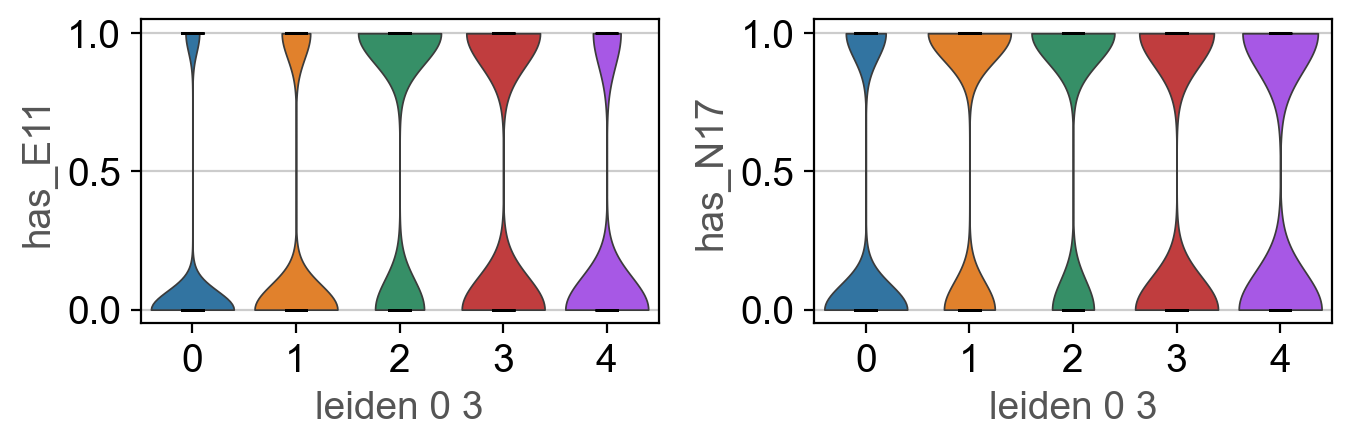

In [189]:
ep.settings.set_figure_params(figsize=(3.8, 2), dpi=100)
ep.pl.violin(adata, keys=["has_E11", "has_N17"], groupby="leiden_0_3")
#ep.pl.violin(adata, keys=["ehrapycat_insurance_Medicare", "Age"], groupby="leiden_0_3")
#ep.pl.violin(adata, keys=["sapsi_first", "copd_flg"], groupby="leiden_0_3")
#ep.pl.violin(adata, keys=["sofa_first", "liver_flg"], groupby="leiden_0_3")

In [200]:
ep.tl.paga(adata, groups="leiden_0_3")

add death ranges

In [ ]:
ep.pl.paga(
    adata,
    color=["leiden_0_3", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.3", "Died in less than 28 days"],
)

Cluster 0: Diabetic Renal Failure + High Mortality
Key Features:
Diabetes (has_E11)
Acute Kidney Injury (has_N17)
Chronic Kidney Disease (has_N18)
Electrolyte imbalances (has_E87 - likely hyper/hyponatremia, hyperkalemia, etc.)
Higher hospital mortality risk (hospital_death)
Interpretation:
These patients are diabetic and have significant kidney dysfunction.
Electrolyte disturbances and acid/base imbalances (HCO3, chloride) suggest they are metabolically unstable.
Higher hospital mortality suggests poor prognosis or severe illness requiring ICU support.
Cluster 1: Respiratory/Cardiovascular Compromise
Key Features:
Glucose abnormalities (low glucose)
Non-invasive ventilation (suggesting respiratory failure/ARDS)
Blood pressure abnormalities (systolic, diastolic, mean)
Respiratory rate, oxygen saturation changes
Interpretation:
These patients likely have more severe pneumonia or ARDS.
Hypoglycemia may be a marker of sepsis or metabolic stress.
More likely to require respiratory support (oxygenation, non-invasive ventilation).
Hemodynamic instability suggests shock, fluid overload, or cardiovascular stress.
Cluster 2: Sepsis with Multi-Organ Dysfunction
Key Features:
Sepsis indicators (elevated BUN, creatinine, low oxygen saturation, high lactate)
Electrolyte abnormalities (phosphorus, sodium, magnesium imbalances)
Lactic acidosis (suggesting poor perfusion, organ dysfunction)
Interpretation:
These patients are critically ill with sepsis and multi-organ failure.
Kidney injury and metabolic disturbances are prominent.
Higher lactate and oxygen desaturation suggest poor perfusion and tissue hypoxia.
Cluster 3: Hemodynamic Instability & Cardiopulmonary Failure
Key Features:
Systolic and diastolic blood pressure instability
Heart rate variability
Oxygen saturation, non-invasive ventilation use
High respiratory rate
Interpretation:
These patients likely have septic or cardiogenic shock.
The unstable blood pressure and heart rate suggest vasopressor requirements.
Respiratory compromise suggests acute lung injury or fluid overload.
Cluster 4: Elderly, Frail, Chronic Illness
Key Features:
Older patients (Medicare insurance prevalence)
Weight changes (suggesting chronic disease/malnutrition)
Chronic metabolic disturbances (elevated BUN, HCO3, hematocrit changes)
Interpretation:
Likely older, frail patients with chronic illnesses (CHF, CKD, COPD, etc.).
May have more comorbidities and be at higher risk of complications.
BUN and metabolic markers suggest underlying chronic kidney or heart failure.
Summary of Clusters
Cluster 0: Diabetic kidney failure + high mortality.
Cluster 1: Severe pneumonia/ARDS with respiratory failure.
Cluster 2: Sepsis with multi-organ dysfunction.
Cluster 3: Shock (septic/cardiogenic) + cardiopulmonary failure.
Cluster 4: Elderly, frail, chronic illness burden.


In [159]:
adata.obs

subject_id               intime  \
stay_id                                     
39698942    10001843  2134-12-05 18:50:03   
33685454    10002155  2129-08-04 12:45:00   
31090461    10002155  2130-09-24 00:50:00   
32358465    10002155  2131-03-09 21:33:00   
33987268    10002428  2156-04-12 16:24:18   
...              ...                  ...   
37403074    19997886  2186-12-06 10:12:48   
32641669    19998330  2178-10-01 08:51:00   
30532790    19998878  2132-08-18 14:18:47   
37692584    19999287  2197-07-26 03:31:06   
31070865    19999625  2139-10-10 19:18:00   

                      outtime   hadm_id  \
stay_id                                   
39698942  2134-12-06 14:38:26  26133978   
33685454  2129-08-10 17:02:38  23822395   
31090461  2130-09-27 22:13:41  28994087   
32358465  2131-03-10 18:09:21  20345487   
33987268  2156-04-17 15:57:08  28662225   
...                       ...       ...   
37403074  2186-12-08 10:35:10  20793010   
32641669  2178-10-03 23:25:08  24492004   
30532790  2132-08-19 03:07:45  29356037   
37692584  2197-07-27 16:07:29  22997012   
31070865  2139-10-11 18:21:28  25304202   

          has_J18                  dod  \
stay_id                                  
39698942        1  2134-12-06 00:00:00   
33685454        1  2131-03-10 00:00:00   
31090461        1  2131-03-10 00:00:00   
32358465        1  2131-03-10 00:00:00   
33987268        1                    0   
...           ...                  ...   
37403074        1  2186-12-11 00:00:00   
32641669        1  2178-12-08 00:00:00   
30532790        1  2133-01-03 00:00:00   
37692584        1  2197-09-02 00:00:00   
31070865        1                    0   

                       ethnicity  \
stay_id                            
39698942                   WHITE   
33685454                   WHITE   
31090461                   WHITE   
32358465                   WHITE   
33987268                   WHITE   
...                          ...   
37403074                   WHITE   
32641669  BLACK/AFRICAN AMERICAN   
30532790                   WHITE   
37692584  BLACK/AFRICAN AMERICAN   
31070865                   WHITE   

         insurance  missing_values_abs  \
stay_id                                  
39698942  Medicare                   0   
33685454  Medicare                   0   
31090461  Medicare                   0   
32358465  Medicare                   0   
33987268  Medicare                   0   
...            ...                 ...   
37403074  Medicare                   0   
32641669  Medicare                   0   
30532790  Medicare                   0   
37692584  Medicare                   0   
31070865  Medicare                   0   

          missing_values_pct gender  
stay_id                              
39698942                 0.0      M  
33685454                 0.0      F  
31090461                 0.0      F  
32358465                 0.0      F  
33987268                 0.0      F  
...                      ...    ...  
37403074                 0.0      M  
32641669                 0.0      F  
30532790                 0.0      M  
37692584                 0.0      F  
31070865                 0.0      M  

[9864 rows x 11 columns]

In [35]:
# We can subset our dataset easily

fdata = adata[adata.obs.gender == "F"]

In [37]:
fdata.obs

subject_id   stay_id                  dod gender  \
hadm_id                                                      
20683754    15332791  30003598                    0      F   
22994815    17686783  30004320  2172-02-13 00:00:00      F   
21677190    13421733  30009753                    0      F   
26952283    14475287  30014019  2119-08-03 00:00:00      F   
20168034    11228718  30021875  2121-01-13 00:00:00      F   
...              ...       ...                  ...    ...   
27351978    10547408  39984768  2167-01-24 00:00:00      F   
26029915    13777050  39985110  2144-10-27 00:00:00      F   
27829512    14606237  39993425  2143-10-30 00:00:00      F   
23907399    13534199  39995213                    0      F   
28258450    19425920  39999168  2190-04-23 00:00:00      F   

                       ethnicity insurance               intime  \
hadm_id                                                           
20683754                   WHITE  Medicare  2189-04-14 20:27:25   
22994815                   WHITE   Private  2171-07-27 17:26:31   
21677190                   WHITE  Medicare  2194-06-01 14:16:00   
26952283        UNABLE TO OBTAIN  Medicare  2119-07-10 23:29:07   
20168034      BLACK/CAPE VERDEAN  Medicare  2121-01-13 17:24:10   
...                          ...       ...                  ...   
27351978                   WHITE  Medicare  2167-01-08 02:08:00   
26029915  BLACK/AFRICAN AMERICAN  Medicare  2141-03-03 05:57:46   
27829512                   WHITE  Medicare  2143-10-27 00:44:00   
23907399                 UNKNOWN   Private  2127-12-11 18:03:43   
28258450                   WHITE  Medicare  2190-04-11 19:36:01   

                      outtime  
hadm_id                        
20683754  2189-04-19 15:57:41  
22994815  2171-07-28 18:11:33  
21677190  2194-06-03 18:12:32  
26952283  2119-08-04 04:49:23  
20168034  2121-01-13 20:40:40  
...                       ...  
27351978  2167-01-10 18:36:48  
26029915  2141-03-09 21:09:15  
27829512  2143-10-29 15:51:42  
23907399  2127-12-17 21:07:04  
28258450  2190-04-21 17:40:54  

[4439 rows x 8 columns]

We might also have metadata at either level that has many dimensions to it, such as a UMAP embedding of the data. For this type of metadata, AnnData has the .obsm/.varm attributes.

We use keys to identify the different matrices we insert. The restriction of .obsm/.varm are that .obsm matrices must length equal to the number of observations as .n_obs and .varm matrices must length equal to .n_vars. They can each independently have different number of dimensions.

### Unstructured Metadata

In [41]:
## Here we can add any info useful in our analyses like data dictionaries or definitions etc.

adata.uns["random"] = [1, 2, 3]
adata.uns



OrderedDict([('random', [1, 2, 3])])

In [40]:
adata.uns # this denotes which columns are numerical and which are not and may be required for certain algos.

OrderedDict([('random', [1, 2, 3])])

### Layers

Finally, we may have different forms of our original core data, perhaps one that is normalized and one that is not. These can be stored in different layers in AnnData. For example, let’s log transform the original data and store it in a layer:

In [ ]:
adata.layers["log_transformed"] = np.log1p(adata.X)
adata
#adata.to_df(layer="log_transformed")

In [53]:
adata.X = np.array(adata.X, dtype=np.float32)

ValueError: could not convert string to float: '2163-03-04'

In [51]:
adata.obs = adata.obs.astype(str)
adata.var = adata.var.astype(str)


In [52]:
adata

AnnData object with n_obs × n_vars = 9864 × 158
    obs: 'subject_id', 'stay_id', 'dod', 'gender', 'ethnicity', 'insurance', 'intime', 'outtime'
    uns: 'random'
    layers: 'original'

In [55]:
adata.write('./notebooks/model_ready/icu_stays1.h5ad', compression=None)

TypeError: Can't implicitly convert non-string objects to strings

Finally, the layers slot of our object saves all original values before any modification in their original state. When using ehrapy the X matrix will constantly be modified when applying algos to the object (e.g. scaling), This layer is a copy of our original x which will allow us to e.g. scale by age but use the original values when coloring a UMAP plot.

In [46]:
adata[adata.obs.ethnicity.isin(['WHITE'])].obs.head()

subject_id   stay_id                  dod gender ethnicity  \
hadm_id                                                                
22744101    15726459  30000831                    0      M     WHITE   
20818145    17938576  30002498  2160-11-25 00:00:00      M     WHITE   
20683754    15332791  30003598                    0      F     WHITE   
22994815    17686783  30004320  2172-02-13 00:00:00      F     WHITE   
29393377    10332722  30005362  2157-01-03 00:00:00      M     WHITE   

         insurance               intime              outtime  
hadm_id                                                       
22744101   Private  2140-04-17 21:26:33  2140-04-20 14:21:57  
20818145  Medicare  2158-01-23 16:00:00  2158-01-24 17:36:04  
20683754  Medicare  2189-04-14 20:27:25  2189-04-19 15:57:41  
22994815   Private  2171-07-27 17:26:31  2171-07-28 18:11:33  
29393377   Private  2156-12-28 21:42:10  2157-01-03 19:16:43

In [51]:
adata.to_df().head()

subject_id Age gender  \
stay_id                          
30000484   18421337  91      M   
30000831   15726459  78      M   
30002498   17938576  59      M   
30003598   15332791  64      F   
30004320   17686783  52      F   

                        ethnicity insurance  \
stay_id                                       
30000484  MULTIPLE RACE/ETHNICITY  Medicare   
30000831                    WHITE   Private   
30002498                    WHITE  Medicare   
30003598                    WHITE  Medicare   
30004320                    WHITE   Private   

         hospital_death  \
stay_id                   
30000484              0   
30000831              0   
30002498              0   
30003598              0   
30004320              0   

                          dod   hadm_id  \
stay_id                                   
30000484  2136-02-21 00:00:00  22413411   
30000831                    0  22744101   
30002498  2160-11-25 00:00:00  20818145   
30003598                    0  20683754   
30004320  2172-02-13 00:00:00  22994815   

                 los has_E87  ...  \
stay_id                       ...   
30000484   59.493333       0  ...   
30000831   64.923333       1  ...   
30002498   25.601111       0  ...   
30003598  115.504444       0  ...   
30004320   24.750556       0  ...   

         MORGANELLA MORGANII_positive  \
stay_id                                 
30000484                            0   
30000831                            0   
30002498                            0   
30003598                            0   
30004320                            0   

         NON-FERMENTER, NOT PSEUDOMONAS AERUGINOSA_positive  \
stay_id                                                       
30000484                                                  0   
30000831                                                  0   
30002498                                                  0   
30003598                                                  0   
30004320                                                  0   

         STREPTOCOCCUS ANGINOSUS (MILLERI) GROUP_positive  \
stay_id                                                     
30000484                                                0   
30000831                                                0   
30002498                                                0   
30003598                                                0   
30004320                                                0   

         SERRATIA MARCESCENS_positive  \
stay_id                                 
30000484                            0   
30000831                            0   
30002498                            0   
30003598                            0   
30004320                            0   

         CANDIDA ALBICANS_positive  \
stay_id                              
30000484                         0   
30000831                         0   
30002498                         0   
30003598                         0   
30004320                         0   

         CLOSTRIDIUM DIFFICILE_positive  \
stay_id                                   
30000484                              0   
30000831                              0   
30002498                              0   
30003598                     2189-04-28   
30004320                              0   

         CANDIDA ALBICANS, PRESUMPTIVE IDENTIFICATION_positive  \
stay_id                                                          
30000484                                                  0      
30000831                                                  0      
30002498                                                  0      
30003598                                                  0      
30004320                                                  0      

         ACHROMOBACTER SP._positive  \
stay_id                               
30000484                          0   
30000831                          0   
30002498                          0   
30003598       

In [52]:
print(f"Number of ICU stays: {str(len(data.index.unique()))}")
print(f"Number of survivors: {str(len(data[data['hospital_death']==0].index.unique()))}")
print(f"Number of non-survivors: {str(len(data[data['hospital_death']==1].index.unique()))}")
print(
    f"Mortality: {str(round(100*len(data[data['hospital_death']==1].index.unique()) / len(data.index.unique()),1))}%"
)

Number of ICU stays: 9864
Number of survivors: 8514
Number of non-survivors: 1350
Mortality: 13.7%


https://ehrapy.readthedocs.io/en/stable/tutorials/notebooks/ml_usecases.html

In [56]:
adata.obs["mortality_cat"] = adata[:, "hospital_death"].X.flatten()

In [ ]:
adata.obs["mortality_cat"] = adata[:, "hospital_death"].X
adata.obs["mortality_cat"] = adata.obs["mortality_cat"].astype(int).astype(str)
adata.obs["stay_id"] = adata.obs.index.astype(int)
adata

https://ehrapy.readthedocs.io/en/stable/tutorials/notebooks/ml_usecases.html

In [58]:
adata_per_patient = ep.ad.df_to_anndata(data.groupby(["stay_id"]).mean())
adata_per_patient

TypeError: agg function failed [how->mean,dtype->object]

In [29]:
# let's try ehrapy's infer feature types
ep.ad.infer_feature_types(adata)

! Features 'hospital_death', 'has_E87', 'has_J18', 'has_I50', 'has_N17', 'has_J96', 'has_E11', 'has_I25', 'has_E78', 'has_J98', 'has_Z51', 'has_I47', 'has_I10', 'has_D64', 'has_Z95', 'has_N18', 'proc_224277', 'proc_224275', 'proc_225402', 'proc_225432', 'proc_224263', 'proc_227194', 'proc_225401', 'proc_225459', 'proc_225752', 'proc_224264', 'proc_224274', 'proc_228129', 'proc_225454', 'proc_228128', 'proc_229351', 'proc_225792', 'proc_225400', 'proc_221217', 'proc_225966', 'proc_225451', 'proc_221214', 'proc_224385', 'proc_229581' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
 Detected feature types for AnnData object 
with 9864 obs and 166 vars
├── 📅 Date features
├── 📐 Numerical features
│   ├── ACD-A Citrate (1000ml)
│   ├── ACD-A Citrate (500ml)
│   ├── Acetaminophen-IV
│   ├── Acetylcysteine
│   ├── Age
│   ├── Alteplase (TPA)
│   ├── Aminocaproic acid (Amicar)
│   ├── Aminophylline
│   ├── Ami

In [30]:
adata = ep.pp.encode(adata, autodetect=True)

Running one-hot encoding on passed column…  …


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
adata = ep.pp.encode(adata, encodings={"one-hot": ["service_unit", "day_icu_intime"]})


In [ ]:
ep.ad.correct_feature_types(adata, )

In [23]:
obs_metric, var_metrics = ep.pp.qc_metrics(adata2)

In [24]:
obs_metric

missing_values_abs  missing_values_pct
0                      0                 0.0
1                      0                 0.0
2                      0                 0.0
3                      0                 0.0
4                      0                 0.0
...                  ...                 ...
9859                   0                 0.0
9860                   0                 0.0
9861                   0                 0.0
9862                   0                 0.0
9863                   0                 0.0

[9864 rows x 2 columns]

In [25]:
var_metrics

missing_values_abs  \
subject_id                       0   
stay_id                          0   
Age                              0   
gender                           0   
ethnicity                        0   
insurance                        0   
hospital_death                   0   
dod                              0   
hadm_id                          0   
los                              0   
has_E87                          0   
has_J18                          0   
has_I50                          0   
has_N17                          0   
has_J96                          0   
has_E11                          0   
has_I25                          0   
has_E78                          0   
has_J98                          0   
has_Z51                          0   
has_I47                          0   
has_I10                          0   
has_D64                          0   
has_Z95                          0   
has_N18                          0   

                missing_values_pct  mean  \
subject_id                     0.0   NaN   
stay_id                        0.0   NaN   
Age                            0.0   NaN   
gender                         0.0   NaN   
ethnicity                      0.0   NaN   
insurance                      0.0   NaN   
hospital_death                 0.0   NaN   
dod                            0.0   NaN   
hadm_id                        0.0   NaN   
los                            0.0   NaN   
has_E87                        0.0   NaN   
has_J18                        0.0   NaN   
has_I50                        0.0   NaN   
has_N17                        0.0   NaN   
has_J96                        0.0   NaN   
has_E11                        0.0   NaN   
has_I25                        0.0   NaN   
has_E78                        0.0   NaN   
has_J98                        0.0   NaN   
has_Z51                        0.0   NaN   
has_I47                        0.0   NaN   
has_I10                        0.0   NaN   
has_D64                        0.0   NaN   
has_Z95                        0.0   NaN   
has_N18                        0.0   NaN   

                median  standard_deviation  \
subject_id         NaN                 NaN   
stay_id            NaN                 NaN   
Age                NaN                 NaN   
gender             NaN                 NaN   
ethnicity          NaN                 NaN   
insurance          NaN                 NaN   
hospital_death     NaN                 NaN   
dod                NaN                 NaN   
hadm_id            NaN                 NaN   
los                NaN                 NaN   
has_E87            NaN                 NaN   
has_J18            NaN                 NaN   
has_I50            NaN                 NaN   
has_N17            NaN                 NaN   
has_J96            NaN                 NaN   
has_E11            NaN                 NaN   
has_I25            NaN                 NaN   
has_E78            NaN                 NaN   
has_J98            NaN                 NaN   
has_Z51            NaN                 NaN   
has_I47            NaN                 NaN   
has_I10            NaN                 NaN   
has_D64            NaN                 NaN   
has_Z95            NaN                 NaN   
has_N18            NaN                 NaN   

                min  max  iqr_outliers  
subject_id      NaN  NaN           NaN  
stay_id         NaN  NaN           NaN  
Age             NaN  NaN           NaN  
gender          NaN  NaN           NaN  
ethnicity       NaN  NaN           NaN  
insurance       NaN  NaN           NaN  
hospital_death  NaN  NaN           NaN  
dod             NaN  NaN           NaN  
hadm_id         NaN  NaN           NaN  
los             NaN  NaN           NaN  
has_E87         NaN  NaN           NaN  
has_J18         NaN  NaN           NaN  
has_I50         NaN  NaN           NaN  
has_N17         NaN  NaN           NaN  
has_J96         NaN  NaN           NaN  
has_E11         NaN  NaN     

In [19]:
ep.settings.set_figure_params(figsize=(4, 3), dpi=100)
ep.pl.violin(adata, keys=["Age"], groupby="gender")

KeyError: 'gender'

In [15]:
ep.ad.infer_feature_types(adata2)

! Features 'hospital_death', 'has_E87', 'has_J18', 'has_I50', 'has_N17', 'has_J96', 'has_E11', 'has_I25', 'has_E78', 'has_J98', 'has_Z51', 'has_I47', 'has_I10', 'has_D64', 'has_Z95', 'has_N18' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
 Detected feature types for AnnData object 
with 9864 obs and 25 vars
├── 📅 Date features
├── 📐 Numerical features
│   ├── Age
│   ├── hadm_id
│   ├── los
│   ├── stay_id
│   └── subject_id
└── 🗂️ Categorical features
    ├── dod (4169 categories)
    ├── ethnicity (33 categories)
    ├── gender (2 categories)
    ├── has_D64 (2 categories)
    ├── has_E11 (2 categories)
    ├── has_E78 (2 categories)
    ├── has_E87 (2 categories)
    ├── has_I10 (2 categories)
    ├── has_I25 (2 categories)
    ├── has_I47 (2 categories)
    ├── has_I50 (2 categories)
    ├── has_J18 (1 categories)
    ├── has_J96 (2 categories)
    ├── has_J98 (2 categories)
    ├── has_N17 (2 ca

In [ ]:
ep.ad.correct_feature_types # use this to fix if feature types aren't correct

In [9]:
adata.obs_names

Index(['Cell_0', 'Cell_1', 'Cell_2',
       'Cell_3', 'Cell_4', 'Cell_5',
       'Cell_6', 'Cell_7', 'Cell_8',
       'Cell_9',
       ...
       'Cell_9854', 'Cell_9855', 'Cell_9856',
       'Cell_9857', 'Cell_9858', 'Cell_9859',
       'Cell_9860', 'Cell_9861', 'Cell_9862',
       'Cell_9863'],
      dtype='object', length=9864)

In [5]:
TableOne(adata.obs, categorical=['gender', 'ethnicity', 'insurance'])

KeyError: "None of [Index(['gender', 'ethnicity', 'insurance'], dtype='object')] are in the [columns]"